In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial as P
import numpy.linalg as la
import scipy . interpolate as scip

**Caso general**

Ej. 1: Pb. Lagrange

Coeficientes: [-3.16182935  2.77248401 -7.86571943 14.46781848]


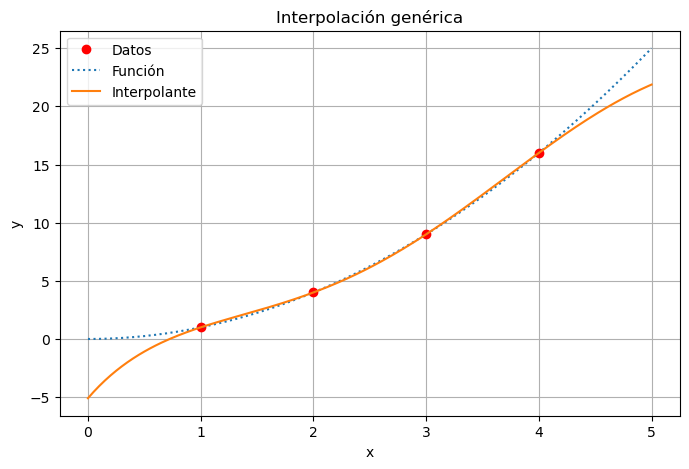

Máximo error de 5.093235426516128 en x = 0.0
Máximo error (en [x1,xn]) de 0.19624543056554167 en x = 1.375


In [2]:
# Definición de la función, el soporte y la base

# Se define la función a aproximar: f(x) = x^2
fun = lambda x: np.power(x, 2)

# Se define una base de funciones (sin(x), cos(x), 1, log(1+x))
# que servirá para generar el espacio de aproximación
base = lambda x: np.array([np.sin(x), np.cos(x), 0*x + 1, np.log1p(x)])

# Puntos de soporte donde se evaluará la función
x = np.array([1, 2, 3, 4])

# Planteamiento y resolución del sistema

# Se evalúa la función objetivo en los puntos x
y = fun(x)

# Se construye la matriz A con las bases evaluadas en x
A = base(x)

# Se resuelve el sistema A^T * c = y para obtener los coeficientes c
# (los coeficientes de la combinación lineal de las funciones base)
c = np.linalg.solve(A.T, y)  # coeficientes

# Se muestran los coeficientes obtenidos
print("Coeficientes: {}".format(c))

# Representación

# Se crea un conjunto de puntos más densos para graficar
X = np.linspace(0, 5, 201)

# Se calcula el interpolante (combinación lineal de las bases con c)
Y = np.dot(c, base(X))

# Se configura la figura de matplotlib
fig = plt.figure(1, figsize=(8, 5), clear=True)

# Se grafican los puntos de datos originales
plt.plot(x, y, 'ro', label='Datos')

# Se grafica la función original f(x)
plt.plot(X, fun(X), ':', label='Función')

# Se grafica la función interpolante obtenida
plt.plot(X, Y, label='Interpolante')

# Se añaden leyenda y títulos
plt.legend()
plt.title('Interpolación genérica')
plt.xlabel('x'); plt.ylabel('y')

# Se añade cuadrícula
plt.grid()

# Se muestra la figura en pantalla
plt.show()

# Estimación del error máximo y su abscisa

# Se calcula el error absoluto en todo el dominio
error1 = abs(Y - fun(X))

# Se muestra el valor máximo del error y su posición
print("Máximo error de {} en x = {}".format(error1.max(), X[error1.argmax()]))

# Se define una máscara para limitar el análisis al intervalo [x1, xn]
idx = (X >= x[0]) * (X <= x[-1])

# Se calcula el error solo dentro del intervalo de interpolación
error2 = abs(Y[idx] - fun(X[idx]))

# Se muestra el error máximo en ese rango y el punto correspondiente
print("Máximo error (en [x1,xn]) de {} en x = {}".format(error2.max(), X[idx][error2.argmax()]))




Ej. 2: Pb. Lagrange

Coeficientes: [0. 0. 1. 0.]


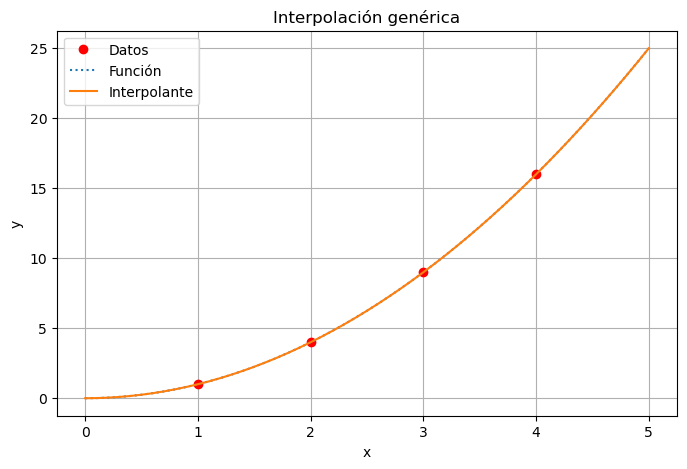

Máximo error de 0.0 en x = 0.0
Máximo error (en [x1,xn]) de 0.0 en x = 1.0


In [3]:
fun = lambda x: np.power(x, 2)

# Base polinómica
base = lambda x : np . array ([0* x +1 ,x , x **2 , x **3])  # Base: [p0, p1, p2, p3]

x = np.array([1, 2, 3, 4])

# Planteamiento y resolución del sistema

y = fun(x)
A = base(x)

c0 = np.linalg.solve(A.T, y) # coeficientes [p0, p1, p2, p3]
print("Coeficientes: {}".format(c0))

# Representación

X = np.linspace(0, 5, 201)

# Obtener el polinomio a partir de los coeficientes y evaluarlo
pol = P.Polynomial (c0)
Y = pol(X)

fig = plt.figure(1, figsize=(8, 5), clear=True)
plt.plot(x, y, 'ro', label='Datos')
plt.plot(X, fun(X), ':', label='Función')
plt.plot(X, Y, label='Interpolante')
plt.legend()
plt.title('Interpolación genérica')
plt.xlabel('x'); plt.ylabel('y')
plt.grid()
plt.show()

# Estimación del error máximo y su abscisa

error1 = abs(Y - fun(X))
print("Máximo error de {} en x = {}".format(error1.max(), X[error1.argmax()]))
idx = (X >= x[0]) * (X <= x[-1])
error2 = abs(Y[idx] - fun(X[idx]))
print("Máximo error (en [x1,xn]) de {} en x = {}".format(error2.max(), X[idx][error2.argmax()]))


In [4]:
display(A.T)

array([[ 1,  1,  1,  1],
       [ 1,  2,  4,  8],
       [ 1,  3,  9, 27],
       [ 1,  4, 16, 64]])

Ej. 3: Vandermode

Coeficientes: [ 0.  1.  0. -0.]


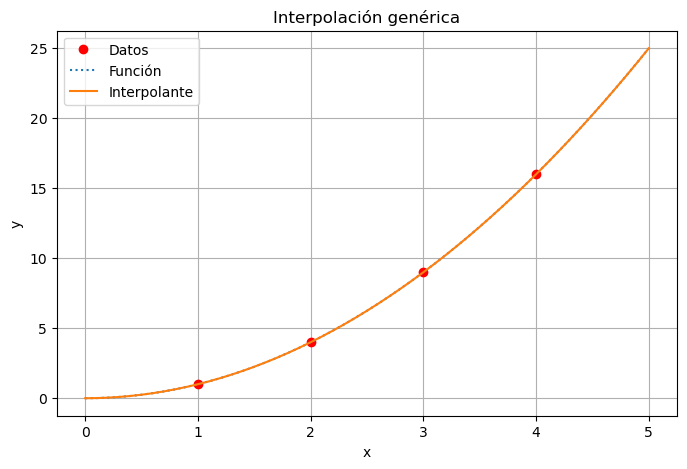

Máximo error de 0.0 en x = 0.0
Máximo error (en [x1,xn]) de 0.0 en x = 1.0


In [5]:
fun = lambda x: np.power(x, 2)

x = np.array([1, 2, 3, 4])

# Planteamiento y resolución del sistema

y = fun(x)

# Cuando la base es polinómica, la matriz del sistema es la de Vandermonde: Base: [p3, p2, p1, p0]
c1 = np.linalg.solve(np.vander(x), y)  # coeficientes [a3, a2, a1, a0]
print("Coeficientes: {}".format(c1))

# Representación

X = np.linspace(0, 5, 201)

# Obtener el polinomio a partir de los coeficientes y evaluarlo
pol = P.Polynomial(c1[::-1])  # invertir -> [a0, a1, a2, a3]
Y = pol(X)

fig = plt.figure(1, figsize=(8, 5), clear=True)
plt.plot(x, y, 'ro', label='Datos')
plt.plot(X, fun(X), ':', label='Función')
plt.plot(X, Y, label='Interpolante')
plt.legend()
plt.title('Interpolación genérica')
plt.xlabel('x'); plt.ylabel('y')
plt.grid()
plt.show()

# Estimación del error máximo y su abscisa

error1 = abs(Y - fun(X))
print("Máximo error de {} en x = {}".format(error1.max(), X[error1.argmax()]))
idx = (X >= x[0]) * (X <= x[-1])
error2 = abs(Y[idx] - fun(X[idx]))
print("Máximo error (en [x1,xn]) de {} en x = {}".format(error2.max(), X[idx][error2.argmax()]))


In [6]:
display(np.vander(x))

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

**Condicionamiento del sistema**

Ej 4: Resolución frontal

Se considera un soporte de hasta N=25 puntos equiespaciados en el intervalo [0,1]
y tomando como solución un vector unitario, se desea estudiar el error de los coeficientes cuando se va aumentando
sucesivamente los puntos desde 1 hasta el total.

error (j=23) = 2.7760902089196883e+20


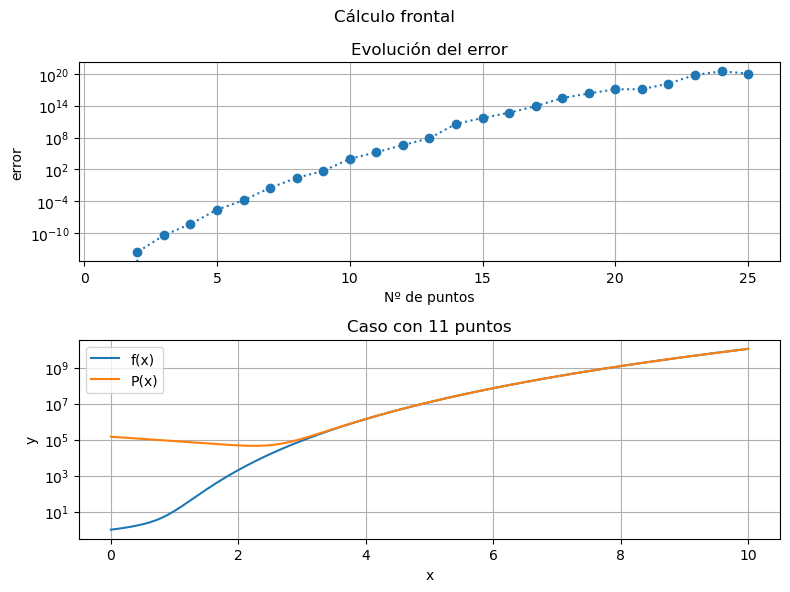

In [7]:
# Cálculos

# Número total de puntos y vector de abscisas
npts = 25
x = np.arange(npts, dtype=float)

# Construcción de la matriz de Vandermonde y parámetros iniciales
V = np.vander(x) # V: matriz de Vandermonde
E = [] # E: lista donde se acumulan errores
orden = 10 # orden: grado de referencia

# Bucle principal: resuelve sistemas reducidos de Vandermonde
for i in range(1, npts + 1):
    # Submatriz correspondiente a las últimas i filas y columnas
    A = V[-i:, -i:]
    
    # Término independiente: suma de filas de A (equivalente a A @ X[-i:] con X=1)
    b = np.sum(A, 1)  # A @ X[-i:]
    
    # Resolución del sistema A * s = b
    s = la.solve(A, b)
    
    # Si se llega al caso del orden especificado, guardar el polinomio asociado
    if i == orden + 1:
        poli = P.Polynomial(s[::-1])  # invertir coeficientes: Polynomial los espera en orden ascendente
    
    # Cálculo del error como la norma del vector (s - 1)
    E.append(la.norm(s - 1))  # s - X[-i:]

# Conversión de la lista de errores a array de NumPy
E = np.array(E)

# Mostrar el índice y el valor del error máximo
print("error (j={}) = {}".format(E.argmax(), E.max()))

# Polinomio de referencia f(x) = 1 + x + x² + ... (todos coeficientes = 1)
pole = P.Polynomial(np.ones(orden + 1))

# Representación

# Crear figura y ejes (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, num=1, figsize=(8, 6), clear=True)
plt.suptitle("Cálculo frontal")

# ---> Representación del error
# Configurar títulos y etiquetas del primer gráfico (error)
axs[0].set(title="Evolución del error", ylabel=r"error", xlabel="Nº de puntos")

# Representar el error en escala logarítmica (semilogy)
axs[0].semilogy(x + 1, E, ":o")
axs[0].grid()

# ---> Representación de una solución
# Vector denso para evaluar los polinomios
X = np.linspace(0, orden, 201)

# Configurar títulos y etiquetas del segundo gráfico (soluciones)
axs[1].set(title=r"Caso con {} puntos".format(orden + 1), xlabel="x", ylabel="y")

# Graficar el polinomio de referencia y el polinomio interpolante
axs[1].semilogy(X, pole(X), ls="-", label="f(x)")
axs[1].semilogy(X, poli(X), ls="-", label="P(x)")

# Mostrar leyenda y rejilla
axs[1].legend()
axs[1].grid()

# Ajustar los márgenes entre subgráficos
fig.tight_layout()

# Uso plt.show() en lugar de fig.show() por Jupyter
# Esto fuerza a Jupyter a renderizar todas las figuras pendientes (y no genera advertencias).
plt.show()


**Cálculo del polinomio de interpolación**

Ej 5: (Convergencia del interpolante)

Interpolar la función f (x) = sin (πx) e−x con 3, 5, 9 y 17 puntos
equiespaciados en [0,3] . Estimar el error máximo y su abscisa cuando se evalúa en 201 puntos.

Lag: error (0.435) = 0.7444665729299209
DD.: error (0.435) = 0.7444665729299209
Lag: error (2.715) = 0.2224178766256374
DD.: error (2.715) = 0.2224178766256305
Lag: error (0.105) = 0.014082866396754323
DD.: error (0.105) = 0.014082866396754545
Lag: error (3.0) = 2.3325869494624203e-05
DD.: error (0.045) = 3.2538368080481384e-07


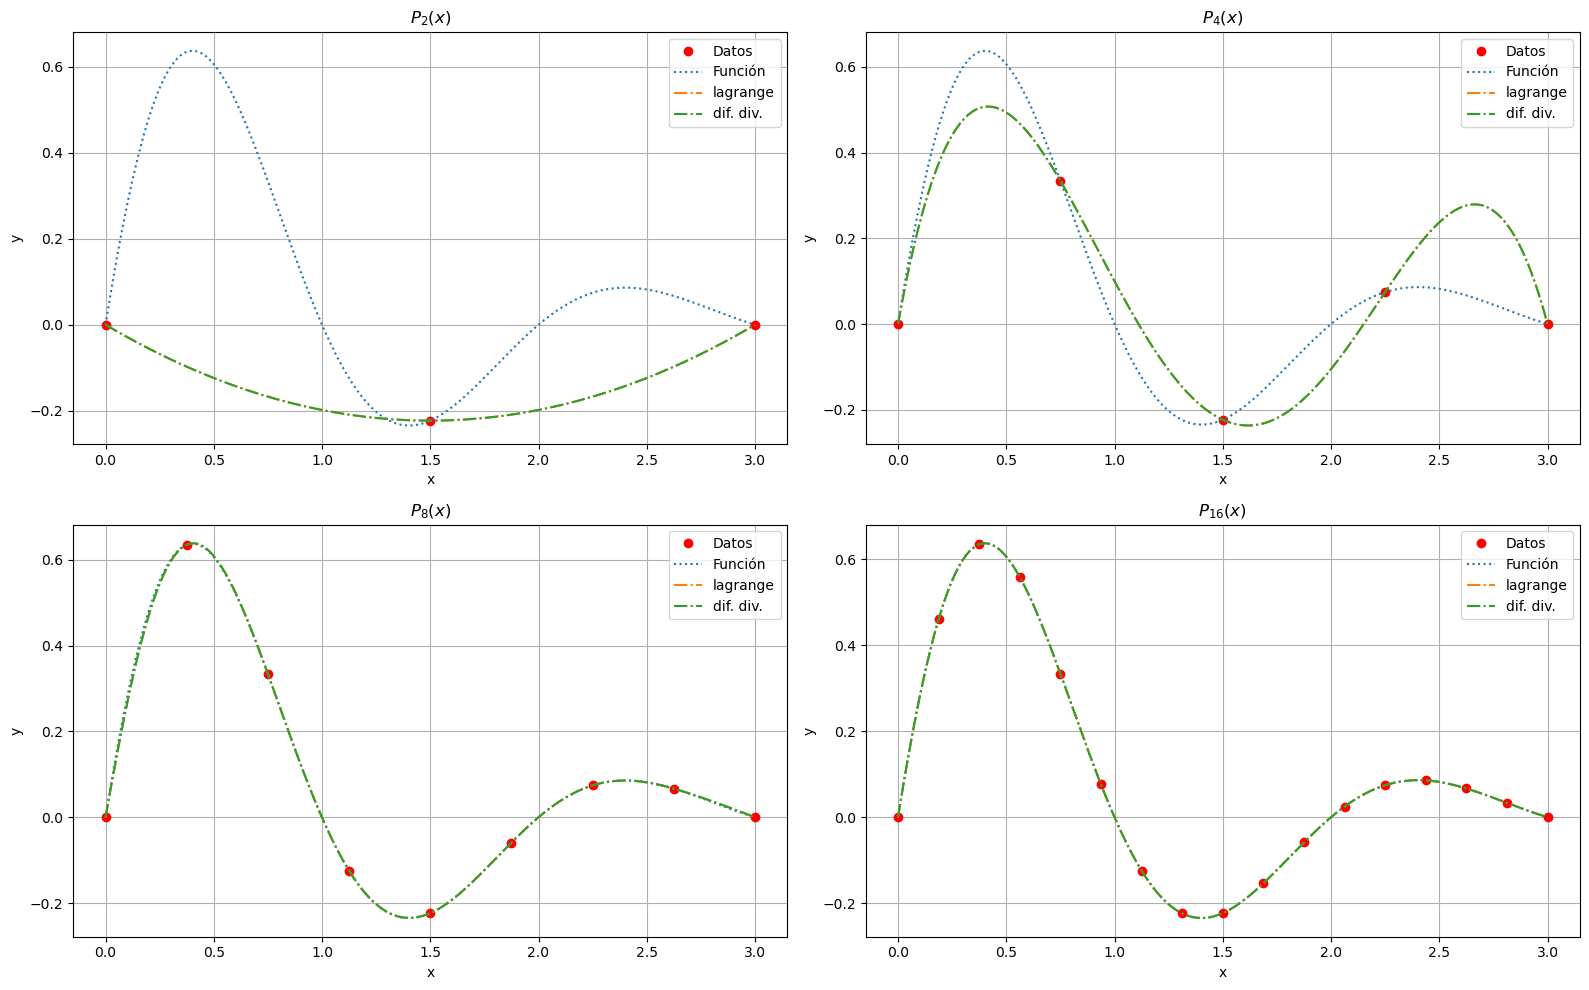

In [8]:
# ==== 1. Definición de los datos ====

# Definición de la función a interpolar: f(x) = sin(pi·x)·exp(-x)
fun = lambda x: np.sin(np.pi * x) * np.exp(-x)

# Intervalo de interpolación
xa, xb = [0, 3]

# Número de puntos usados en cada interpolación
Npts = [3, 5, 9, 17]

# Creación de figura y ejes (2x2 subplots)
fig, ax = plt.subplots(2, 2, num=2, figsize=(16, 10), clear=True)
ax = ax.flatten()  # aplanar el array de ejes para indexar con un solo índice

# Puntos de evaluación "densos" para comparar e interpolar
X = np.linspace(xa, xb, 201)
Y = fun(X)  # valores reales de la función

# ==== 2. Obtención del interpolante y el error ====
for j, npts in enumerate(Npts):
    # Nodos de interpolación y sus valores
    x = np.linspace(xa, xb, npts)
    y = fun(x)

    # Interpolante de Lagrange (polinomio explícito)
    pla = scip.lagrange(x, y)

    # Interpolante por diferencias divididas (BarycentricInterpolator)
    pdd = scip.BarycentricInterpolator(x, y)

    # Cálculo del error absoluto en los puntos densos
    ela = abs(Y - pla(X))
    edd = abs(Y - pdd(X))

    # Máximos errores y posiciones donde se producen (Lagrange)
    elm = ela.max()
    ilm = ela.argmax()

    # Máximos errores y posiciones donde se producen (diferencias divididas)
    edm = edd.max()
    idm = edd.argmax()

    # Mostrar los errores máximos en consola
    print("Lag: error ({}) = {}".format(X[ilm], elm))
    print("DD.: error ({}) = {}".format(X[idm], edm))

    # ==== 3. Representación ====
    # Gráfico de los datos y los interpolantes para este número de puntos
    ax[j].plot(x, y, 'ro', label='Datos')            # puntos originales
    ax[j].plot(X, fun(X), ls=':', label='Función')   # función exacta
    ax[j].plot(X, pla(X), ls='-.', label='lagrange') # interpolante de Lagrange
    ax[j].plot(X, pdd(X), ls='-.', label='dif. div.')# interpolante por diferencias divididas

    # Título con el grado del polinomio (npts-1)
    tit = "$P_{" + "{}".format(npts - 1) + "}(x)$"
    ax[j].set(title=tit, xlabel="x", ylabel="y")

    # Añadir leyenda y cuadrícula
    ax[j].legend()
    ax[j].grid();

# Ajustar diseño para evitar solapamientos
fig.tight_layout()

# Mostrar la figura (en Jupyter esto renderiza sin advertencias)
plt.show()


Ej 6: Fenómeno de Runge

Repetir el proceso tomando f (x) = e−x en [-5,5].

El fenómeno de Runge es un efecto clásico en interpolación polinómica:
cuando intentas aproximar una función suave con polinomios de alto grado en puntos equiespaciados, el polinomio oscila fuertemente cerca de los extremos del intervalo, aunque interpole perfectamente los datos.

Lag: error (-1.7999999999999998) = 0.8312361049028127
DD.: error (1.8000000000000007) = 0.8312361049028129
Lag: error (-3.95) = 0.5600815515835609
DD.: error (-3.95) = 0.5600815515835607
Lag: error (-4.6) = 1.4847117654259825
DD.: error (-4.6) = 1.4847117654258077
Lag: error (-4.85) = 5.571935871815431
DD.: error (-4.85) = 5.5719358635528105


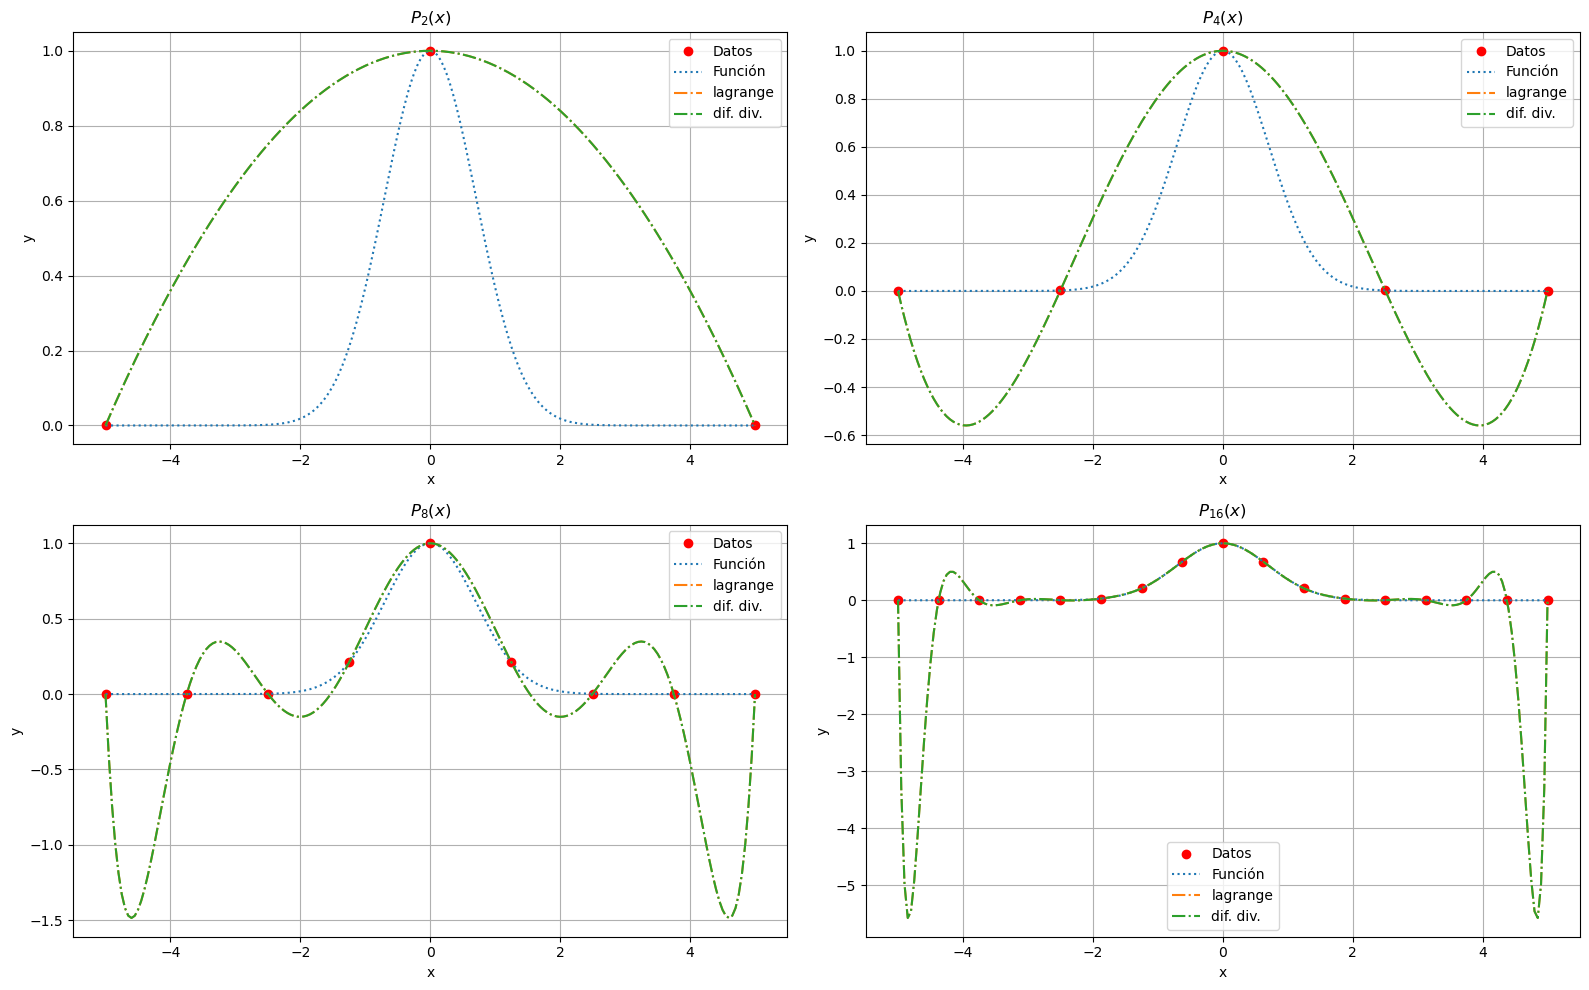

In [9]:
# Función: e ** (- x ** 2)
fun = lambda x: np.exp(-x**2)

# Intervalo [-5,5]
xa, xb = [-5, 5]

Npts = [3, 5, 9, 17]
fig, ax = plt.subplots(2, 2, num=2, figsize=(16, 10), clear=True)
ax = ax.flatten()
X = np.linspace(xa, xb, 201)
Y = fun(X)

# 2. Obtención del interpolante y el error
for j, npts in enumerate(Npts):
    x = np.linspace(xa, xb, npts); y = fun(x)
    pla = scip.lagrange(x, y)
    pdd = scip.BarycentricInterpolator(x, y)
    ela = abs(Y - pla(X)); edd = abs(Y - pdd(X))
    elm = ela.max(); edm = edd.max()
    ilm = ela.argmax(); idm = edd.argmax()
    print("Lag: error ({}) = {}".format(X[ilm], elm))
    print("DD.: error ({}) = {}".format(X[idm], edm))

    # 3. Representación
    ax[j].plot(x, y, 'ro', label='Datos')
    ax[j].plot(X, fun(X), ls=':', label='Función')
    ax[j].plot(X, pla(X), ls='-.', label='lagrange')
    ax[j].plot(X, pdd(X), ls='-.', label='dif. div.')
    tit = "$P_{" + "{}".format(npts - 1) + "}(x)$"
    ax[j].set(title=tit, xlabel="x", ylabel="y")
    ax[j].legend()
    ax[j].grid();

fig.tight_layout()
plt.show()


**Base de polinomios de Lagrange**

Ej 7: Crear una función que calcule la base de polinomios de Lagrange, con las siguientes
condiciones: nombre y parámetros: base_lagrange(x); resultado: lista con Lkn (x) , polinomios de la base de lagrange para el soporte {x}.

== Comparación con la teoría ==
L0(x)  = -0.166667 + 0.0833333·x + 0.166667·x^2 - 0.0833333·x^3
L0^th  = -0.166667 + 0.0833333·x + 0.166667·x^2 - 0.0833333·x^3
Coef iguales: True

L1(x)  = 0.666667 - 0.666667·x - 0.166667·x^2 + 0.166667·x^3
L1^th  = 0.666667 - 0.666667·x - 0.166667·x^2 + 0.166667·x^3
Coef iguales: True

L2(x)  = 0.666667 + 0.666667·x - 0.166667·x^2 - 0.166667·x^3
L2^th  = 0.666667 + 0.666667·x - 0.166667·x^2 - 0.166667·x^3
Coef iguales: True

L3(x)  = -0.166667 - 0.0833333·x + 0.166667·x^2 + 0.0833333·x^3
L3^th  = -0.166667 - 0.0833333·x + 0.166667·x^2 + 0.0833333·x^3
Coef iguales: True

Matriz L_k(x_i) (≈ identidad):
 [[ 1.  0.  0.  0.]
 [-0.  1.  0.  0.]
 [ 0.  0.  1. -0.]
 [ 0.  0.  0.  1.]]
Coeficientes de sum(L_k): [1. 0.]

Resultado global: OK
Matriz de valores L_k(x_i): filas=k, columnas=i
[[ 1.  0.  0.  0.]
 [-0.  1.  0.  0.]
 [ 0.  0.  1. -0.]
 [ 0.  0.  0.  1.]]
Coeficientes de sum(L_k): [1. 0.]
Máx |sum(L_k)(x) - 1| en rejilla: 2.220446049250313e-16


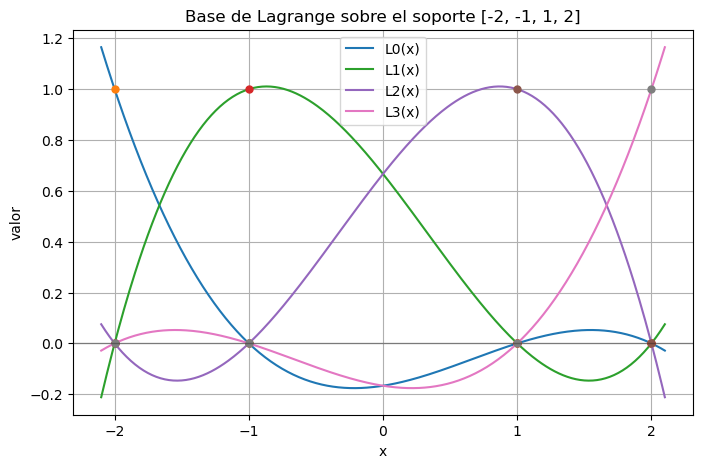

In [10]:
import numpy as np
from numpy.polynomial import Polynomial

def base_lagrange(x):
    """
    Construye la base de polinomios de Lagrange {L_k} para el soporte x.

    Parámetros
    ----------
    x : list | tuple | numpy.ndarray
        Soporte de nodos de interpolación.

    Devuelve
    --------
    list[Polynomial]
        Lista [L0, L1, ..., Ln-1] de polinomios de Lagrange como
        numpy.polynomial.Polynomial (coeficientes en orden ascendente).

    Algoritmo
    ---------
    1) Normalización de entrada: tuple -> list, ndarray -> list, list -> ok; sino -> ValueError.
    2) Para cada x_k:
       a) copiar soporte
       b) eliminar x_k
       c) P = Polynomial.fromroots(soporte_sin_k)  (P tiene ceros en los otros nodos)
       d) L_k = P / P(x_k)
       e) añadir L_k a la lista
    """
    # --- 1. Comprobación / normalización de la entrada ---
    if isinstance(x, tuple):
        x = list(x)
    elif isinstance(x, np.ndarray):
        x = x.tolist()
    elif isinstance(x, list):
        pass
    else:
        raise ValueError("x debe ser list, tuple o numpy.ndarray")

    # Validaciones básicas
    if len(x) == 0:
        raise ValueError("El soporte x no puede estar vacío.")
    if len(set(x)) != len(x):
        raise ValueError("El soporte x contiene nodos repetidos (no permitido).")

    # --- 2. Construcción de la base de Lagrange ---
    L = []
    for k, xk in enumerate(x):
        soporte_sin_k = x.copy()
        soporte_sin_k.pop(k)

        # Polinomio con ceros en todos los nodos excepto xk
        P = Polynomial.fromroots(soporte_sin_k)

        # Normalización por P(xk)
        denom = P(xk)
        if np.isclose(denom, 0.0):
            raise ZeroDivisionError(
                "Denominador ~0 al evaluar P(xk); revisa nodos muy cercanos o repetidos."
            )

        Lk = P / denom
        L.append(Lk)

    return L


# Ejecutarlo con datos y resultados conocidos.

def pretty_poly(p: Polynomial, var="x"):
    coefs = p.coef
    terms = []
    for k, a in enumerate(coefs):
        if np.isclose(a, 0):
            continue
        if k == 0:
            terms.append(f"{a:g}")
        elif k == 1:
            terms.append(f"{a:g}·{var}")
        else:
            terms.append(f"{a:g}·{var}^{k}")
    return " + ".join(terms).replace("+ -", "- ")

def verify_theory_support():
    soporte = [-2, -1, 1, 2]
    L = base_lagrange(soporte)

    # Polinomios de la teoría (coeficientes en orden ascendente: [c0, c1, c2, c3])
    L0_th = Polynomial([-1/6,  1/12,  1/6,  -1/12])   # (-1/12)*(x^3 - 2x^2 - x + 2)
    L1_th = Polynomial([ 2/3, -2/3,  -1/6,  1/6])     # (1/6)*(x^3 - x^2 - 4x + 4)
    L2_th = Polynomial([ 2/3,  2/3,  -1/6, -1/6])     # (-1/6)*(x^3 + x^2 - 4x - 4)
    L3_th = Polynomial([-1/6, -1/12,  1/6,  1/12])    # (1/12)*(x^3 + 2x^2 - x - 2)
    L_th  = [L0_th, L1_th, L2_th, L3_th]

    print("== Comparación con la teoría ==")
    ok_all = True
    for k, (Lk, Lk_th) in enumerate(zip(L, L_th)):
        # Alinea grados para comparar
        deg = max(len(Lk.coef), len(Lk_th.coef))
        a = np.pad(Lk.coef, (0, deg - len(Lk.coef)))
        b = np.pad(Lk_th.coef, (0, deg - len(Lk_th.coef)))
        eq = np.allclose(a, b, atol=1e-12, rtol=1e-12)
        ok_all &= eq
        print(f"L{k}(x)  = {pretty_poly(Lk)}")
        print(f"L{k}^th  = {pretty_poly(Lk_th)}")
        print(f"Coef iguales: {eq}\n")

    # Kronecker y suma a 1
    vals = np.array([[Lk(xi) for xi in soporte] for Lk in L], dtype=float)
    S = sum(L, Polynomial([0.0]))
    print("Matriz L_k(x_i) (≈ identidad):\n", np.round(vals, 10))
    print("Coeficientes de sum(L_k):", np.round(S.coef, 12))

    # <-- corrección: igualamos longitudes con padding antes de comparar con [1,0,0,0]
    target = np.array([1, 0, 0, 0], dtype=float)
    deg = max(len(S.coef), len(target))
    Sa = np.pad(S.coef, (0, deg - len(S.coef)))
    Tb = np.pad(target,  (0, deg - len(target)))
    ok_sum = np.allclose(Sa, Tb, atol=1e-12, rtol=1e-12)

    print("\nResultado global:",
          "OK" if ok_all and np.allclose(vals, np.eye(4)) and ok_sum else "REVISAR")

verify_theory_support()



# Verificación rápida (propiedad de Kronecker y suma a la unidad)

# Soporte de ejemplo (puedes usar el de la teoría: [-2, -1, 1, 2])
soporte = [-2, -1, 1, 2]
L = base_lagrange(soporte)

# 1) Propiedad de Kronecker: L_k(x_i) = delta_{ik}
print("Matriz de valores L_k(x_i): filas=k, columnas=i")
vals = np.array([[Lk(xi) for xi in soporte] for Lk in L], dtype=float)
print(np.round(vals, 10))  # debería ser una identidad

# 2) Suma a la unidad: sum_k L_k(x) = 1 (polinomio constante)
S = sum(L, Polynomial([0.0]))
# Comprobamos que S ~ 1 (coeficientes ~ [1, 0, 0, ...])
print("Coeficientes de sum(L_k):", np.round(S.coef, 12))

# 3) (Opcional) Evaluación numérica en una rejilla
xx = np.linspace(min(soporte), max(soporte), 200)
err = np.max(np.abs(S(xx) - 1.0))
print("Máx |sum(L_k)(x) - 1| en rejilla:", err)


# Representación

xx = np.linspace(min(soporte)-0.1, max(soporte)+0.1, 400)
plt.figure(figsize=(8,5))
for k, Lk in enumerate(L):
    plt.plot(xx, Lk(xx), label=f"L{k}(x)")
    # Marcas en los nodos (Kronecker)
    yi = [Lk(xi) for xi in soporte]
    plt.plot(soporte, yi, "o", ms=5)

plt.axhline(0, lw=1, color="k", alpha=0.3)
plt.title("Base de Lagrange sobre el soporte {}".format(soporte))
plt.xlabel("x"); plt.ylabel("valor")
plt.legend()
plt.grid(True)
plt.show()


**Soporte de Tchebishev**

El error del polinomio de Lagrange se minora cogiendo como puntos de interpolación las raíces de los polinomios
de Tchebishev y haciendo luego un cambio de variable al intervalo final

   n      x_max_error        error_max
------------------------------------------
   3         -1.7           0.79029
   5          1.4           0.56527
   9            1           0.19985
  17          2.2           0.01856


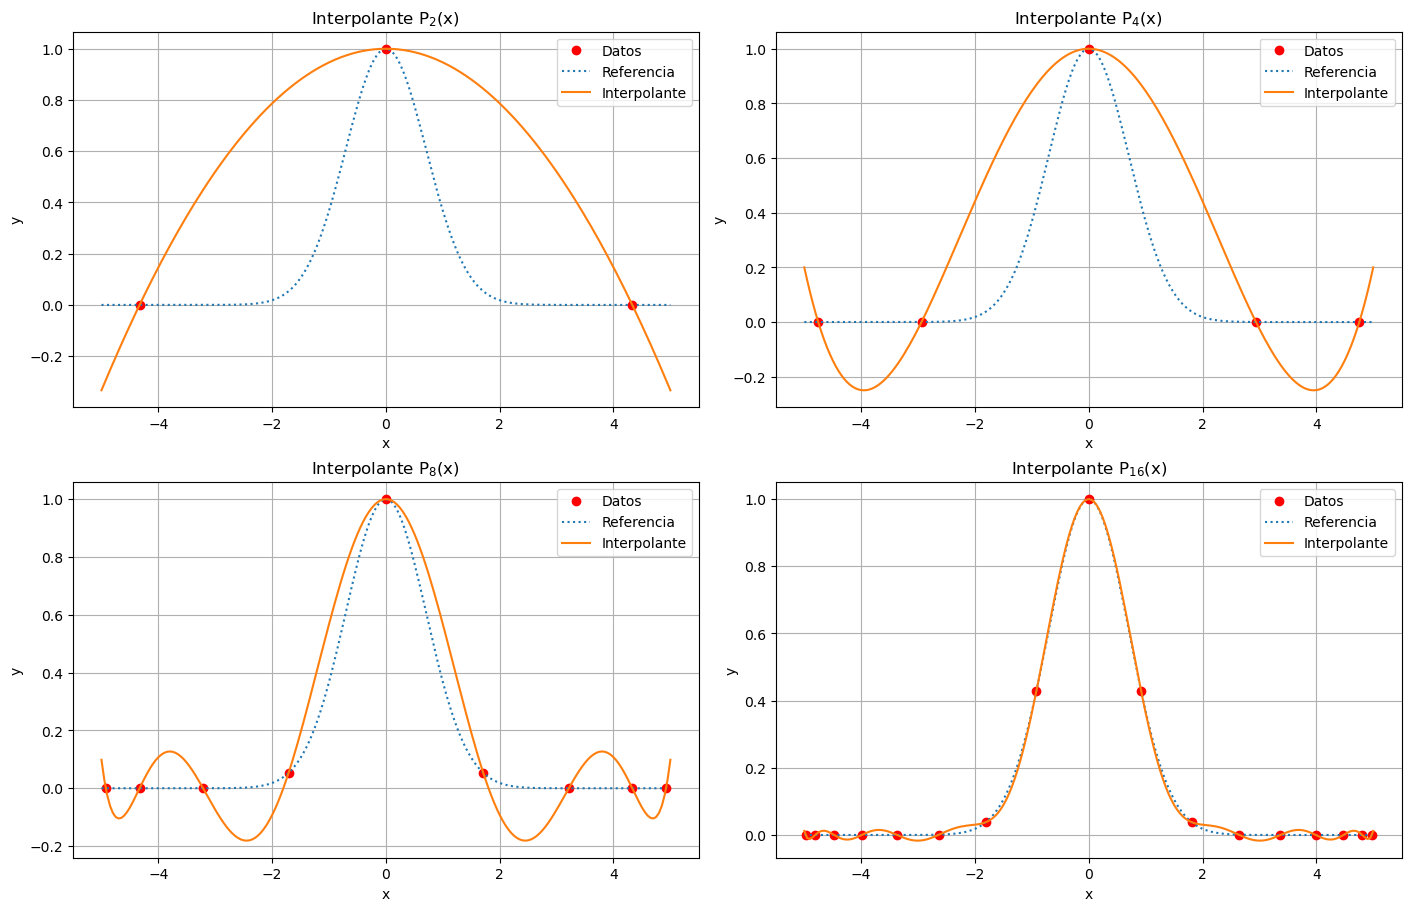

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
import numpy.polynomial as P  # para el chequeo opcional de raíces

# ---------------------------
# Nodos de Tchebyshev (raíces)
# ---------------------------
def chebyshev_nodes(n, a=-1.0, b=1.0):
    """
    Calcula los n nodos de Tchebyshev de 1ª especie (raíces de T_n)
    mapeados al intervalo [a,b].

    Fórmulas:
        t_k = cos((2k-1)π / (2n)),   k = 1..n   → raíces en [-1,1]
        x_k = (a+b)/2 + (b-a)/2 * t_k  → transformación lineal a [a,b]
    """
    # Índices de los nodos (1, 2, ..., n)
    k = np.arange(1, n+1, dtype=float)

    # Raíces de T_n(x) en [-1,1]
    t = np.cos((2*k - 1) * np.pi / (2*n))

    # Transformación lineal para pasar de [-1,1] a [a,b]
    xm = 0.5*(a+b)   # punto medio del intervalo
    xr = 0.5*(b-a)   # semilongitud del intervalo

    # Nodos de Tchebyshev en [a,b]
    return xm + xr*t


# --------------------------------
# Base de Lagrange (polinomios L_k)
# --------------------------------
def base_lagrange(x):
    """
    Calcula la base de polinomios de Lagrange {L_k(x)} asociada a los nodos x.
    Cada L_k cumple: L_k(x_i) = δ_ik (1 si i=k, 0 en el resto).

    Devuelve:
        lista de polinomios L_k representados como objetos Polynomial
    """
    # Convertimos a array NumPy (por si llega lista o tupla)
    x = np.array(x, dtype=float)

    # Comprobamos que los nodos sean distintos
    if len(np.unique(x)) != len(x):
        raise ValueError("Nodos repetidos en 'x'.")

    L = []  # lista donde se guardarán los polinomios base

    # Bucle sobre cada nodo x_k
    for k, xk in enumerate(x):
        # Se eliminan los demás nodos (excepto xk)
        otros = np.delete(x, k)

        # Polinomio con ceros en todos los otros nodos
        Pk = Polynomial.fromroots(otros)

        # Evaluamos Pk(xk) para normalizar (garantizar Lk(xk)=1)
        denom = Pk(xk)
        if np.isclose(denom, 0.0):
            raise ZeroDivisionError("Denominador ~0 al evaluar P(xk).")

        # L_k(x) = Pk(x) / Pk(xk)
        L.append(Pk / denom)

    return L


# -----------------------------------------------
# Función pedida: interpolante con nodos Tchebyshev
# -----------------------------------------------
def itp_Tchebishev(fun, npts, a, b):
    """
    Construye el polinomio interpolante de Lagrange de una función 'fun'
    en el intervalo [a,b], usando npts nodos de Tchebyshev.

    Parámetros:
        fun  : función continua o lambda (vectorizable)
        npts : número de puntos de interpolación
        a,b  : límites del intervalo

    Devuelve:
        p : polinomio interpolante (objeto Polynomial)
        x : nodos de interpolación utilizados (ordenados)
    """
    # Calculamos y ordenamos los nodos de Tchebyshev en [a,b]
    x = np.sort(chebyshev_nodes(npts, a, b))

    # Evaluamos la función en los nodos
    y = fun(x)

    # Obtenemos la base de Lagrange asociada a los nodos
    L = base_lagrange(x)

    # Construimos el interpolante:
    # p(x) = Σ y_k * L_k(x)
    p = sum((yk * Lk for yk, Lk in zip(y, L)), Polynomial([0.0]))

    # Devolvemos el polinomio y los nodos usados
    return p, x

# -----------------------------------------
# (Opcional) Comprobación de raíces de T_3
# -----------------------------------------
# pol = P.Chebyshev.basis(3)  # T3(x)
# print("Raíces de T3 en [-1,1]:", pol.roots())

# =========================================
# Ejemplos 9: f(x)=e^{-x^2} en [-5,5]
# =========================================
fun = lambda x: np.exp(-x**2)
a, b = -5.0, 5.0
Npts = [3, 5, 9, 17]

# Rejilla para evaluación del error
X = np.linspace(a, b, 201)
Y = fun(X)

# Tabla de resultados
print("   n      x_max_error        error_max")
print("------------------------------------------")

fig, axs = plt.subplots(2, 2, figsize=(14, 9), constrained_layout=True)
axs = axs.ravel()

for j, n in enumerate(Npts):
    p, xnodes = itp_Tchebishev(fun, n, a, b)
    Yp = p(X)
    err = np.abs(Y - Yp)
    emax = float(err.max())
    imax = int(err.argmax())
    x_at = float(X[imax])

    # Línea de la tabla (redondeo similar al de tu lámina)
    print(f"{n:4d}   {x_at:10.3g}        {emax:10.5f}")

    # ---- gráficos ----
    ax = axs[j]
    ax.plot(xnodes, fun(xnodes), "ro", label="Datos")
    ax.plot(X, Y, ":", label="Referencia")
    ax.plot(X, Yp, "-", label="Interpolante")
    ax.set_title(f"Interpolante P$_{{{n-1}}}$(x)")
    ax.set_xlabel("x"); ax.set_ylabel("y")
    ax.grid(True)
    ax.legend()

plt.show()


**Pb. Hermite**

Ejemplos 10 (Convergencia del interpolante). Interpolar la función f (x) = e−x con 5 y 9 puntos equiespaciados
en [-5,5] y conociendo también el valor de la derivada. Estimar el error máximo y su abscisa cuando se evalúa en
201 puntos.

Tabla de resultados (errores en la rejilla de 201 puntos)
puntos |   Krogh: error máx   abscisa   | HermiteSpline: error máx   abscisa
-------------------------------------------------------------------------------
     9 |         0.845759     4.60 |           0.012458     0.80
     5 |         0.305687    -3.95 |           0.297011    -1.15


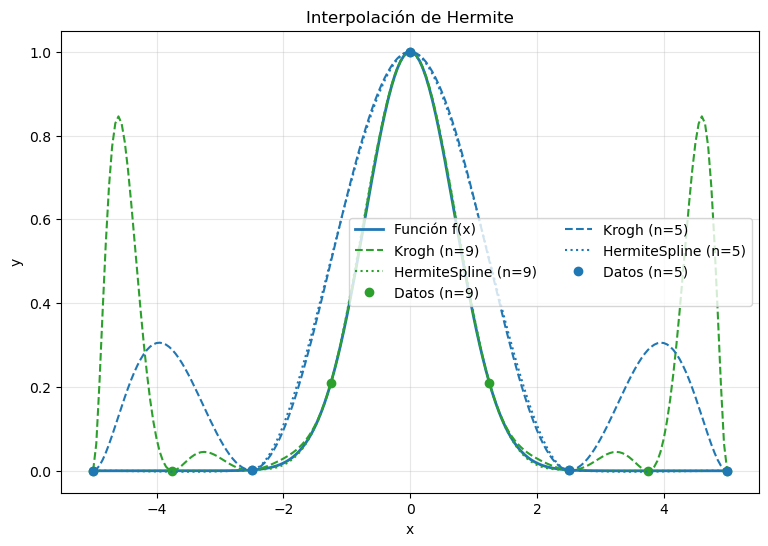

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as scip

# ===============================
# 1) Definición de los datos
# ===============================
f  = lambda x: np.exp(-x**2)          # f(x) = e^{-x^2}
df = lambda x: -2*x*np.exp(-x**2)     # f'(x)

xa, xb = -5.0, 5.0                    # intervalo
Npts = [9, 5]                         # nº de puntos equiespaciados por caso

X = np.linspace(xa, xb, 201)          # rejilla para medir error
Y = f(X)

# ===============================
# 2) Obtención del interpolante y el error
# ===============================
print("Tabla de resultados (errores en la rejilla de 201 puntos)")
print("puntos |   Krogh: error máx   abscisa   | HermiteSpline: error máx   abscisa")
print("-------------------------------------------------------------------------------")

# Para el gráfico final guardamos ambos interpolantes por caso
curvas = []   # elementos: dict por cada n con polinomios y nodos

for npts in Npts:
    # Nodos equiespaciados y sus valores
    ptos = np.linspace(xa, xb, npts)
    fx   = f(ptos)
    dfx  = df(ptos)

    # --- KroghInterpolator (Hermite) ---
    # Para Krogh, se pasa cada x_i DOS veces: primero para f(x_i) y luego para f'(x_i)
    x_krogh = np.vstack([ptos, ptos]).T.flatten()
    y_krogh = np.vstack([fx,   dfx]).T.flatten()
    polk = scip.KroghInterpolator(x_krogh, y_krogh)

    # --- CubicHermiteSpline ---
    polc = scip.CubicHermiteSpline(ptos, fx, dfx)

    # Errores en la rejilla
    Ek = np.abs(Y - polk(X))
    Ec = np.abs(Y - polc(X))

    ek_max = Ek.max(); xk_at = X[Ek.argmax()]
    ec_max = Ec.max(); xc_at = X[Ec.argmax()]

    print(f"{npts:6d} | {ek_max:16.6f} {xk_at:8.2f} | {ec_max:18.6f} {xc_at:8.2f}")

    curvas.append({
        "n": npts,
        "ptos": ptos,
        "fx": fx,
        "polk": polk,
        "polc": polc
    })

# ===============================
# 3) Representación
# ===============================
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(X, Y, label="Función f(x)", lw=2)

# estilos por caso
estilos = {5: {"c":"tab:blue"}, 9: {"c":"tab:green"}}

for c in curvas:
    n = c["n"]; st = estilos[n]
    # Krogh
    ax.plot(X, c["polk"](X), ls="--", label=f"Krogh (n={n})", **st)
    # HermiteSpline
    ax.plot(X, c["polc"](X), ls=":",  label=f"HermiteSpline (n={n})", **st)
    # Datos
    ax.plot(c["ptos"], c["fx"], "o", c=st["c"], ms=6, label=f"Datos (n={n})")

ax.set_title("Interpolación de Hermite")
ax.set_xlabel("x"); ax.set_ylabel("y")
ax.grid(True, alpha=0.3)
ax.legend(ncol=2)
plt.show()


**Itp. Segmentaria**

Ejemplos 11 (Convergencia del interpolante). Obtener los interpolantes segmentarios para la función f (x) =
sin (πx) e−x con 3, 5, 9 y 17 puntos equiespaciados en [0,3] . Estimar el error máximo y su abscisa cuando se
evalúa en 201 puntos.

Resultados numéricos (error máximo en rejilla de 201 puntos)
     n |    tipo |      ε máx         x*
----------------------------------------

Itp. segm. con 3 puntos
     3 |    zero |    0.63749      0.405
     3 | slinear |    0.69888      0.420
     3 | quadratic |    0.74447      0.435

Itp. segm. con 5 puntos
     5 |    zero |    0.63749      0.405
     5 | slinear |    0.47225      0.345
     5 | quadratic |    0.32086      0.330
     5 |   cubic |    0.20287      0.345

Itp. segm. con 9 puntos
     9 |    zero |    0.63128      0.360
     9 | slinear |    0.14295      0.195
     9 | quadratic |    0.01140      0.195
     9 |   cubic |    0.02784      0.120

Itp. segm. con 17 puntos
    17 |    zero |    0.44756      0.180
    17 | slinear |    0.03563      0.285
    17 | quadratic |    0.00245      0.060
    17 |   cubic |    0.00323      0.075


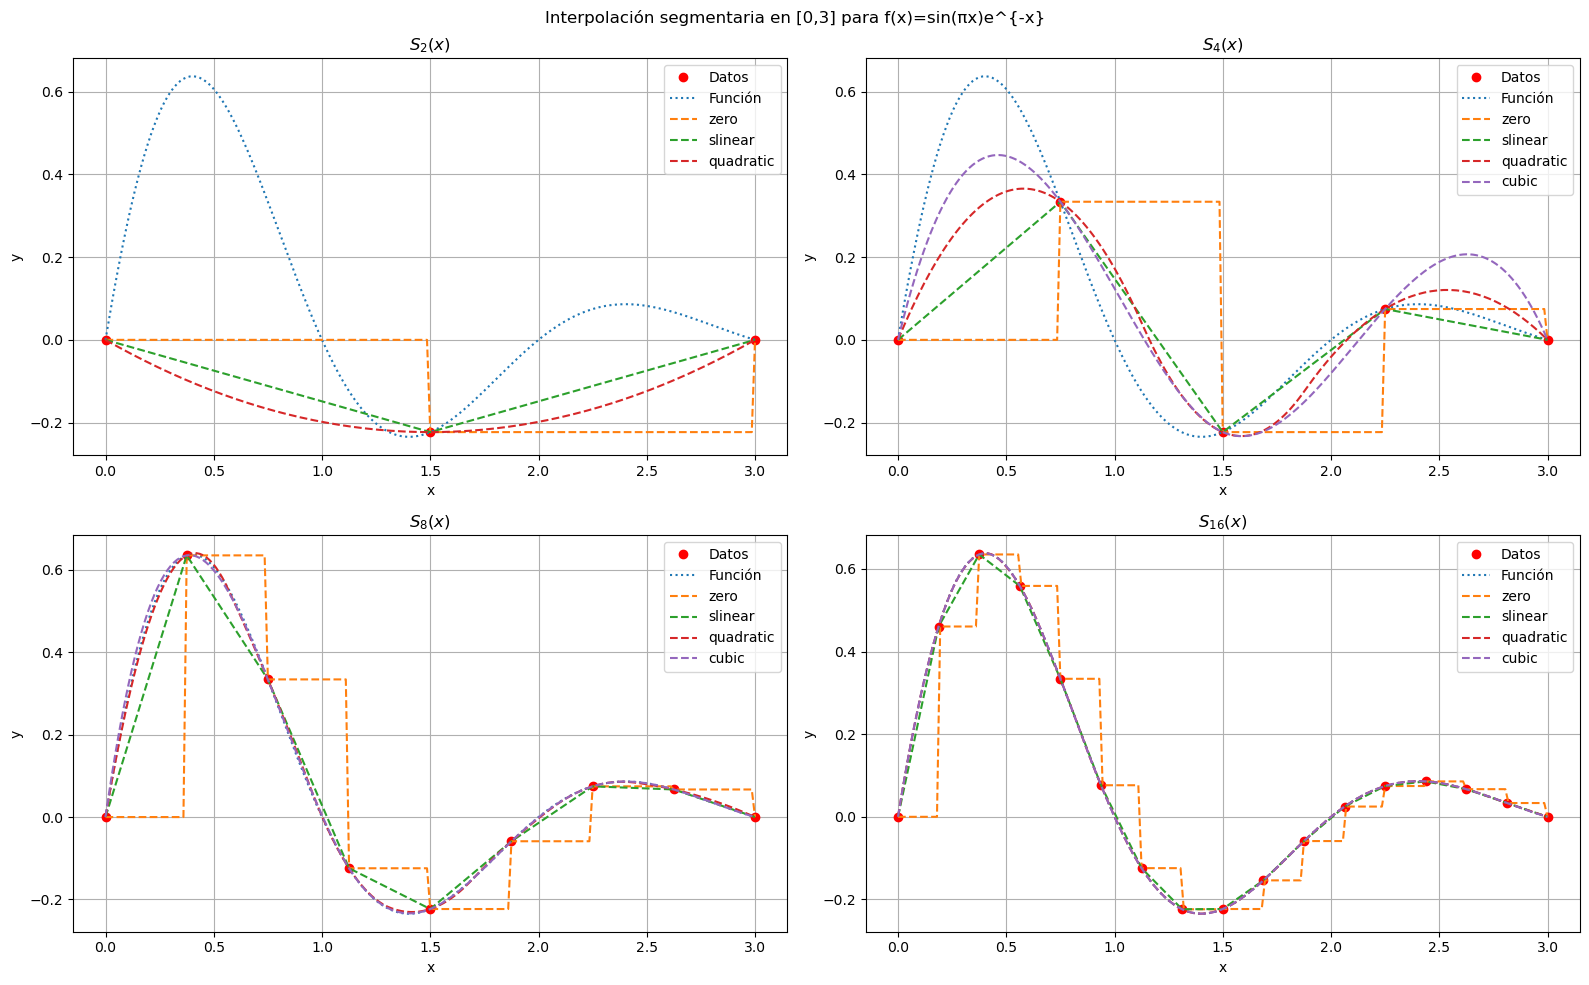

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scip

# 1) Definiciones
fun  = lambda x: np.sin(np.pi*x)*np.exp(-x)
xa, xb = 0.0, 3.0
Npts = [3, 5, 9, 17]
tipos = ['zero', 'slinear', 'quadratic', 'cubic']  # órdenes 0,1,2,3
X = np.linspace(xa, xb, 201)
Y = fun(X)

# Encabezado de la tabla
print("Resultados numéricos (error máximo en rejilla de 201 puntos)")
print("{:>6} | {:>7} | {:>10} {:>10}".format("n", "tipo", "ε máx", "x*"))
print("-"*40)

# 2) Interpolante y error (y gráfica)
fig, axs = plt.subplots(2, 2, figsize=(16, 10), clear=True)
axs = axs.ravel()

for j, n in enumerate(Npts):
    # nodos equiespaciados y datos
    x = np.linspace(xa, xb, n)
    y = fun(x)

    ax = axs[j]
    ax.plot(x, y, 'ro', label='Datos')              # nodos
    ax.plot(X, Y, ls=':', label='Función')          # referencia

    print(f"\nItp. segm. con {n} puntos")
    for kind in tipos:
        try:
            # construir interpolante segmentario del tipo indicado
            pol = scip.interp1d(x, y, kind=kind)

            # evaluar y medir error
            Z = pol(X)
            err = np.abs(Y - Z)
            emax = err.max()
            x_at = X[err.argmax()]

            # imprimir fila de tabla
            print("{:>6} | {:>7} | {:>10.5f} {:>10.3f}".format(n, kind, emax, x_at))

            # añadir a la gráfica de este n
            ax.plot(X, Z, ls='--', label=kind)
        except Exception:
            # (por si algún 'kind' no está disponible para pocos puntos)
            pass

    # formateo del subplot
    titulo = r"$S_{{{}}}(x)$".format(n-1)  # como en la lámina: “Interpolante S_{n-1}(x)”
    ax.set(title=titulo, xlabel="x", ylabel="y")
    ax.legend()
    ax.grid(True)

# 3) Representación final
plt.suptitle("Interpolación segmentaria en [0,3] para f(x)=sin(πx)e^{-x}")
plt.tight_layout()
plt.show()


Ejemplo 12 (fenómeno de Runge). Repetir el proceso tomando f (x) = e−x en [-5,5].

Resultados numéricos (error máximo en rejilla de 201 puntos)
     n |    tipo |      ε máx         x*
----------------------------------------

Itp. segm. con 3 puntos
     3 |    zero |    1.00000      4.950
     3 | slinear |    0.60442     -1.700
     3 | quadratic |    0.83124      1.800

Itp. segm. con 5 puntos
     5 |    zero |    0.99753      2.450
     5 | slinear |    0.30022     -1.400
     5 | quadratic |    0.39571      1.150
     5 |   cubic |    0.44851     -1.300

Itp. segm. con 9 puntos
     9 |    zero |    0.78789     -0.050
     9 | slinear |    0.10601     -0.350
     9 | quadratic |    0.02123     -0.450
     9 |   cubic |    0.02763     -0.800

Itp. segm. con 17 puntos
    17 |    zero |    0.44579     -0.650
    17 | slinear |    0.06915     -0.300
    17 | quadratic |    0.01415      0.850
    17 |   cubic |    0.00703      0.900


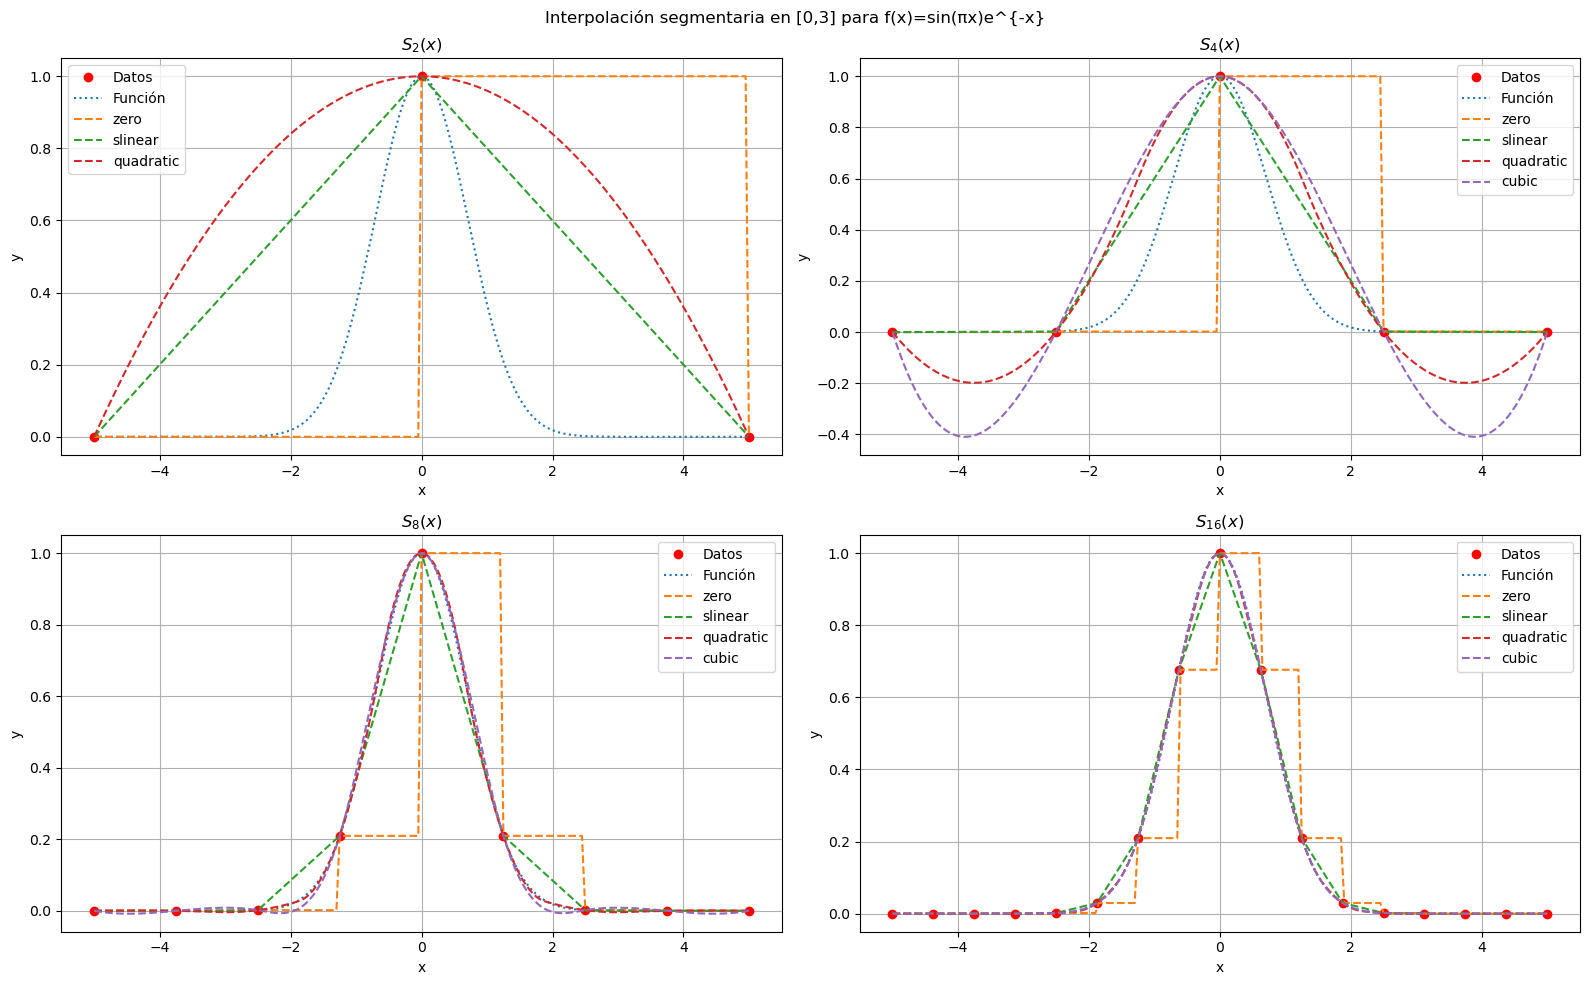

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scip

# 1) Definiciones

# Función: e ** (- x ** 2)
fun = lambda x: np.exp(-x**2)

# Intervalo [-5,5]
xa, xb = -5.0, 5.0

Npts = [3, 5, 9, 17]
tipos = ['zero', 'slinear', 'quadratic', 'cubic']  # órdenes 0,1,2,3
X = np.linspace(xa, xb, 201)
Y = fun(X)

# Encabezado de la tabla
print("Resultados numéricos (error máximo en rejilla de 201 puntos)")
print("{:>6} | {:>7} | {:>10} {:>10}".format("n", "tipo", "ε máx", "x*"))
print("-"*40)

# 2) Interpolante y error (y gráfica)
fig, axs = plt.subplots(2, 2, figsize=(16, 10), clear=True)
axs = axs.ravel()

for j, n in enumerate(Npts):
    # nodos equiespaciados y datos
    x = np.linspace(xa, xb, n)
    y = fun(x)

    ax = axs[j]
    ax.plot(x, y, 'ro', label='Datos')              # nodos
    ax.plot(X, Y, ls=':', label='Función')          # referencia

    print(f"\nItp. segm. con {n} puntos")
    for kind in tipos:
        try:
            # construir interpolante segmentario del tipo indicado
            pol = scip.interp1d(x, y, kind=kind)

            # evaluar y medir error
            Z = pol(X)
            err = np.abs(Y - Z)
            emax = err.max()
            x_at = X[err.argmax()]

            # imprimir fila de tabla
            print("{:>6} | {:>7} | {:>10.5f} {:>10.3f}".format(n, kind, emax, x_at))

            # añadir a la gráfica de este n
            ax.plot(X, Z, ls='--', label=kind)
        except Exception:
            # (por si algún 'kind' no está disponible para pocos puntos)
            pass

    # formateo del subplot
    titulo = r"$S_{{{}}}(x)$".format(n-1)  # como en la lámina: “Interpolante S_{n-1}(x)”
    ax.set(title=titulo, xlabel="x", ylabel="y")
    ax.legend()
    ax.grid(True)

# 3) Representación final
plt.suptitle("Interpolación segmentaria en [0,3] para f(x)=sin(πx)e^{-x}")
plt.tight_layout()
plt.show()

**Interpolación segmentaria cúbica**

Ejemplos 13 (Convergencia del interpolante). Obtener los interpolantes segmentarios cúbicos para la función f (x) =
sin (πx) e−x con 5 y 9 puntos equiespaciados en [0,3] . Estimar el error máximo y su abscisa cuando se evalúa en
201 puntos. Usar también la interpolación cúbica suavizada.

Resultados numéricos (error máximo en 201 puntos)
    n       método       ε máx        x*
------------------------------------------
    5   not-a-knot     0.20287     0.345
    5      clamped     0.47126     0.315
    5      natural     0.36369     0.315
    5        akima     0.36105     0.330
    9   not-a-knot     0.02784     0.120
    9      clamped     0.20564     0.150
    9      natural     0.05816     0.150
    9        akima     0.04484     0.525


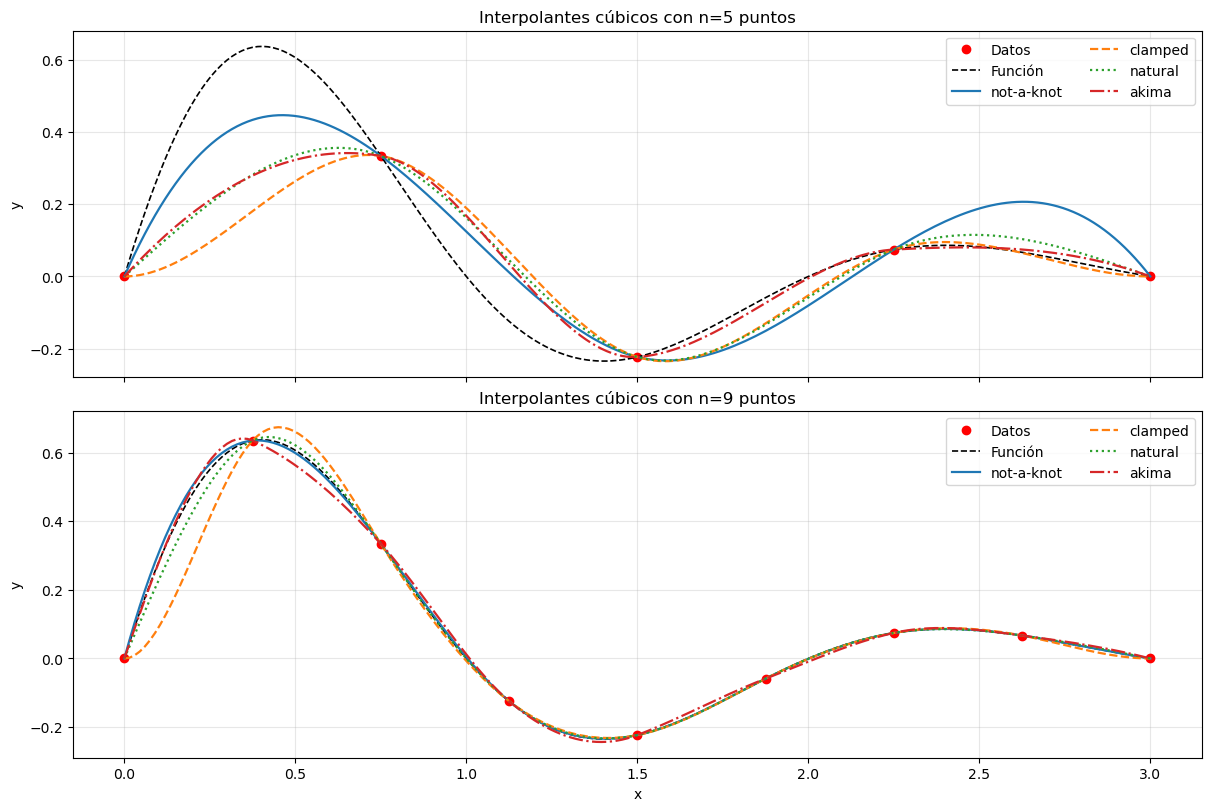

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as scip

# f y f' (¡ojo a dfun!: d/dx[sin(pi x) e^{-x}] = (pi cos(pi x) - sin(pi x)) e^{-x})
fun  = lambda x: np.sin(np.pi*x)*np.exp(-x)
dfun = lambda x: (np.pi*np.cos(np.pi*x) - np.sin(np.pi*x)) * np.exp(-x)

xa, xb = 0.0, 3.0
Npts = [5, 9]
X = np.linspace(xa, xb, 201)
Y = fun(X)

print("Resultados numéricos (error máximo en 201 puntos)")
print("{:>5}  {:>11}  {:>10}  {:>8}".format("n", "método", "ε máx", "x*"))
print("-"*42)

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True, constrained_layout=True)

for row, n in enumerate(Npts):
    x = np.linspace(xa, xb, n)
    y = fun(x)

    # CubicSpline: not-a-knot (por defecto)
    spl_not = scip.CubicSpline(x, y, bc_type='not-a-knot')

    # CubicSpline: clamped — usa derivadas exactas en los extremos (¡esto es lo que pedías!)
    spl_cla = scip.CubicSpline(x, y, bc_type='clamped')  # tangentes = 0 en a y b

    # CubicSpline: natural — segunda derivada 0 en los extremos
    spl_nat = scip.CubicSpline(x, y, bc_type='natural')

    # Akima
    spl_aki = scip.Akima1DInterpolator(x, y)

    # Evalúa
    Z_not = spl_not(X)
    Z_cla = spl_cla(X)
    Z_nat = spl_nat(X)
    Z_aki = spl_aki(X)

    # Tabla de errores
    for name, Z in [("not-a-knot", Z_not), ("clamped", Z_cla), ("natural", Z_nat), ("akima", Z_aki)]:
        err = np.abs(Y - Z)
        emax = float(err.max())
        x_at = float(X[err.argmax()])
        print("{:5d}  {:>11}  {:10.5f}  {:8.3f}".format(n, name, emax, x_at))

    # Gráfico
    ax = axs[row]
    ax.plot(x, y, "ro", label="Datos")
    ax.plot(X, Y, "k--", lw=1.2, label="Función")
    ax.plot(X, Z_not, "-",  lw=1.6, label="not-a-knot")
    ax.plot(X, Z_cla, "--", lw=1.6, label="clamped")
    ax.plot(X, Z_nat, ":",  lw=1.6, label="natural")
    ax.plot(X, Z_aki, "-.", lw=1.6, label="akima")
    ax.set_title(f"Interpolantes cúbicos con n={n} puntos")
    ax.set_ylabel("y"); ax.grid(True, alpha=0.3); ax.legend(ncol=2)

axs[-1].set_xlabel("x")
plt.show()


Ejemplos 14 (Interpretación de las condiciones). Repetir el proceso tomando f (x) = x3 − 1 en [-1,2] con 4 puntos
de interpolación. Añadir también cuando se dan las pendientes en los extremos (bc=[[1,f ′ (a)],[[1,f ′ (b)]])

Resultados numéricos (error máximo en 201 puntos)
    método |       x* |    ε máx
--------------------------------
not-a-knot |    1.475 |  0.00000
   natural |    1.625 |  0.56836
   clamped |    1.625 |  2.02148
        bc |    1.805 |  0.00000
     Akima |    0.575 |  0.38489


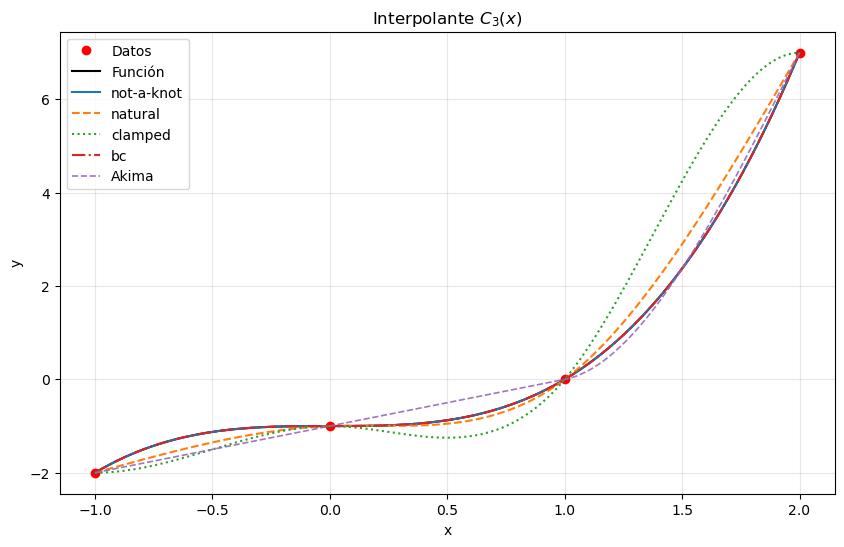

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as scip

# ===============================
# 1) Definición de la función y derivada
# ===============================
fun  = lambda x: x**3 - 1
dfun = lambda x: 3*x**2          # derivada analítica

xa, xb = -1.0, 2.0               # intervalo
n = 4                            # número de nodos
x = np.linspace(xa, xb, n)       # nodos equiespaciados
y = fun(x)

# Rejilla densa para comparar
X = np.linspace(xa, xb, 201)
Y = fun(X)

# ===============================
# 2) Construcción de los interpolantes
# ===============================

# 1. not-a-knot  (por defecto)
spl_not = scip.CubicSpline(x, y, bc_type='not-a-knot')

# 2. natural  (segunda derivada nula en extremos)
spl_nat = scip.CubicSpline(x, y, bc_type='natural')

# 3. clamped  (tangentes horizontales en extremos)
spl_cla = scip.CubicSpline(x, y, bc_type='clamped')  # equivale a f'(a)=f'(b)=0

# 4. bc  (derivadas reales impuestas)
spl_bc  = scip.CubicSpline(x, y, bc_type=((1, dfun(xa)), (1, dfun(xb))))

# 5. Akima
spl_aki = scip.Akima1DInterpolator(x, y)

# ===============================
# 3) Evaluación y errores
# ===============================
interps = {
    "not-a-knot": spl_not(X),
    "natural":    spl_nat(X),
    "clamped":    spl_cla(X),
    "bc":         spl_bc(X),
    "Akima":      spl_aki(X),
}

print("Resultados numéricos (error máximo en 201 puntos)")
print("{:>10} | {:>8} | {:>8}".format("método", "x*", "ε máx"))
print("-"*32)

for name, Z in interps.items():
    err = np.abs(Y - Z)
    emax = err.max()
    x_at = X[err.argmax()]
    print(f"{name:>10} | {x_at:8.3f} | {emax:8.5f}")

# ===============================
# 4) Representación
# ===============================
plt.figure(figsize=(10,6))
plt.plot(x, y, "ro", label="Datos")
plt.plot(X, Y, "k-", lw=1.5, label="Función")

estilos = {
    "not-a-knot": dict(ls="-",  lw=1.5),
    "natural":    dict(ls="--", lw=1.5),
    "clamped":    dict(ls=":",  lw=1.5),
    "bc":         dict(ls="-.", lw=1.5),
    "Akima":      dict(ls="--", lw=1.2, alpha=0.9),
}

for name, Z in interps.items():
    plt.plot(X, Z, label=name, **estilos[name])

plt.title(r"Interpolante $C_3(x)$")
plt.xlabel("x"); plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


**Porche 911**

Se desea mecanizar mediante máquinas herramientas el perfil de un vehículo (“Porsche911_Perfil.jpg)”, para lo
que se requiere una función que lo defina. Sobre el perfil de la figura se han tomado medidas que vienen en el fichero
“Porsche911_Perfil.txt”.

Ejemplos 15 (porsche911). Seleccionar el mejor interpolador para esos datos.

Notas:
1. Descargar los datos, y cargarlos en Python mediante
17sal = np.genfromtxt(’ITP_Porsche911_Perfil.txt’, delimiter=’,’)
x = sal.T[0]; y = sal.T[1]
2. Descargar la imagen, y cargarla en Python mediante
img = plt.imread(’./Porsche911_Perfil.jpg’)
3. La imagen se puede añadir al fichero con las gráficas con
plt.imshow(img)
4. Para no deformar las imagenes, conviene poner la misma escala en ambos ejes
plt.axis("equal")

In [17]:
sal = np.genfromtxt("IP_datos/Porsche911_perfil.txt", delimiter=",")
x = sal.T[0]; y = sal.T[1]

img = plt.imread("IP_datos/Porsche911_Perfil.jpg")

Notas rápidas

clamped impone pendientes en los extremos; aquí las estimo por regresión lineal local de 2 puntos.

PCHIP suele ser una gran opción para perfiles técnicos al ser shape-preserving (evita oscilaciones y overshoot).

Si Akima devolviera NaN en LOOCV en tus datos, no pasa nada: algunos folds pueden ser problemáticos; sigue siendo válido para visualizar la curva. Si te molesta, elimina Akima del diccionario methods.

Es una técnica muy usada para evaluar modelos (en este caso, interpoladores):

Quitamos un punto del conjunto de datos.

Ajustamos el modelo usando los 
n−1
n−1 puntos restantes.

Predecimos el valor en el punto que quitamos.

Medimos el error de predicción.

Repetimos el proceso para todos los puntos y hacemos la media cuadrática del error.


LOOCV RMSE por método (menor es mejor):
  akima       : 5.569616
  pchip       : 5.902088
  not-a-knot  : 8.788407
  natural     : 9.609576
  clamped     : 10.074840


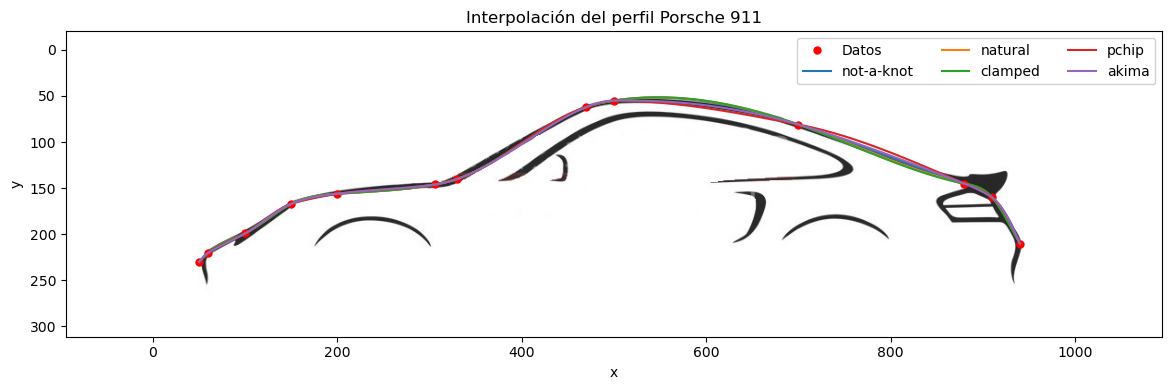

In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, Akima1DInterpolator, PchipInterpolator

# =========================
# Configuración de entrada
# =========================
TXT_PATH = "IP_datos/Porsche911_perfil.txt"   # CSV con dos columnas: x,y
IMG_PATH = "IP_datos/Porsche911_Perfil.jpg"   # imagen de referencia

# =========================
# 1) Cargar datos e imagen
# =========================
data = np.genfromtxt(TXT_PATH, delimiter=",")
if data.ndim != 2 or data.shape[1] < 2:
    raise ValueError("El fichero de datos debe tener al menos dos columnas (x,y).")

x, y = data[:, 0], data[:, 1]

# Ordenar por x por si vinieran desordenados
order = np.argsort(x)
x = x[order]
y = y[order]

# Imagen (opcional, para superponer)
try:
    img = plt.imread(IMG_PATH)
    has_img = True
except Exception:
    img = None
    has_img = False

# =========================
# 2) Utilidades
# =========================
def endpoint_slopes(x, y):
    """
    Estima las pendientes en los extremos mediante diferencias finitas (2 puntos).

    m0 = (y1 - y0) / (x1 - x0)
    m1 = (yn - yn-1) / (xn - xn-1)

    Esta es la forma más sencilla y habitual de obtener las pendientes
    necesarias para el spline 'clamped' cuando no se dispone de la función analítica.
    """
    # pendiente inicial (primer tramo)
    m0 = (y[1] - y[0]) / (x[1] - x[0])
    # pendiente final (último tramo)
    m1 = (y[-1] - y[-2]) / (x[-1] - x[-2])
    return float(m0), float(m1)

def build_interpolants(x, y):
    """Construye varios interpolantes 1D y devuelve un dict nombre->objeto."""
    m0, m1 = endpoint_slopes(x, y)
    interps = {
        "not-a-knot": CubicSpline(x, y, bc_type="not-a-knot"),
        "natural":    CubicSpline(x, y, bc_type="natural"),
        "clamped":    CubicSpline(x, y, bc_type=((1, m0), (1, m1))),  # clamped con pendientes estimadas
        "pchip":      PchipInterpolator(x, y),                        # shape-preserving
        "akima":      Akima1DInterpolator(x, y),
    }
    return interps

def loocv_rmse(x, y, method_name):
    n = len(x)
    errs2 = []
    for i in range(1, n-1):  # ¡saltamos extremos!
        mask = np.ones(n, dtype=bool); mask[i] = False
        xi, yi = x[mask], y[mask]
        f = (
            CubicSpline(xi, yi, bc_type='not-a-knot') if method_name=='not-a-knot' else
            CubicSpline(xi, yi, bc_type='natural')    if method_name=='natural'    else
            CubicSpline(xi, yi, bc_type=((1,(yi[1]-yi[0])/(xi[1]-xi[0])),
                                         (1,(yi[-1]-yi[-2])/(xi[-1]-xi[-2])))) if method_name=='clamped' else
            PchipInterpolator(xi, yi)                 if method_name=='pchip'     else
            Akima1DInterpolator(xi, yi)
        )
        pred = float(f(x[i]))  # ahora está dentro del intervalo
        errs2.append((pred - y[i])**2)
    return float(np.sqrt(np.mean(errs2)))

# =========================
# 3) Interpolación y métrica
# =========================
methods = build_interpolants(x, y)
X = np.linspace(x.min(), x.max(), 1000)

rmse = {}
for name in methods.keys():
    rmse[name] = loocv_rmse(x, y, name)

# Ordenar métodos por RMSE (mejor = menor)
order_methods = sorted(rmse.items(), key=lambda kv: (np.inf if np.isnan(kv[1]) else kv[1]))
print("\nLOOCV RMSE por método (menor es mejor):")
for name, r in order_methods:
    print(f"  {name:11s} : {r:.6f}" if np.isfinite(r) else f"  {name:11s} : NaN")

# =========================
# 4) Figura con la imagen
# =========================
fig, ax = plt.subplots(figsize=(12, 4))

if has_img:
    h, w = img.shape[:2]
    # La imagen se pinta con 'extent' para que sus coordenadas sean [0,w]x[0,h]
    ax.imshow(img, extent=[0, w, 0, h], origin='lower', alpha=0.85)
    ax.set_xlim(0, w); ax.set_ylim(0, h)

ax.invert_yaxis()
    
# Datos
ax.plot(x, y, 'ro', ms=5, label="Datos")

# Curvas
for name, f in methods.items():
    ax.plot(X, f(X), label=name)

ax.set_title("Interpolación del perfil Porsche 911")
ax.set_xlabel("x"); ax.set_ylabel("y")
ax.axis('equal')
ax.grid(False)
ax.legend(ncol=3, framealpha=0.9)
plt.tight_layout()
plt.show()

# =========================
# 5) (Opcional) Guardar
# =========================
# plt.savefig("porsche911_interpolantes.png", dpi=200, bbox_inches="tight")
# np.savetxt("porsche911_rmse.csv", np.array(list(rmse.items()), dtype=object), fmt="%s", delimiter=",")


**Itp. Paramétrica**

Ejemplos 16 (Curvas cerradas). Generar 9 puntos sobre la elipse x3 + y2 = 1 y utilizar interpolación paramétrica

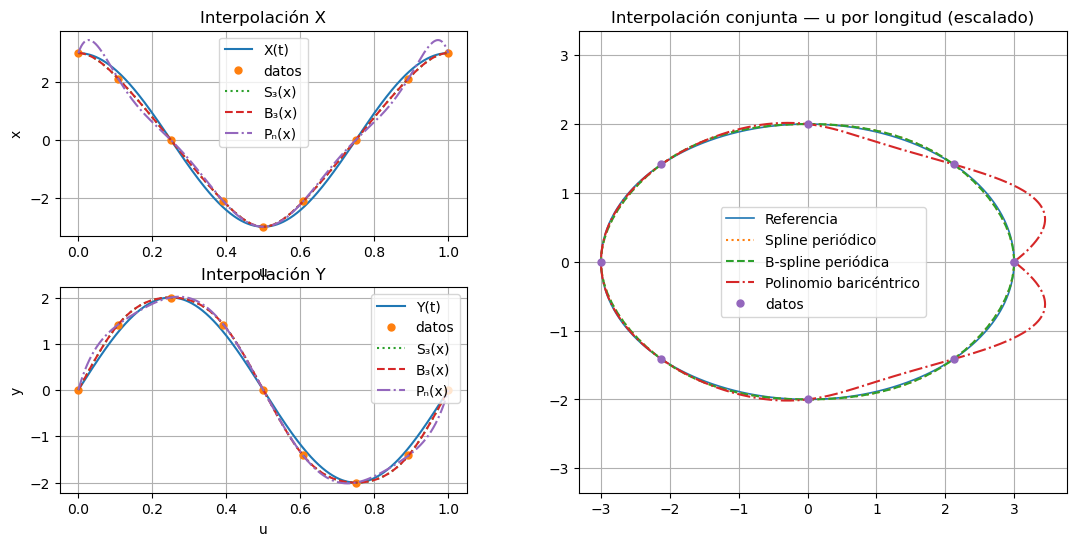

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator, CubicSpline, splprep, splev

# ================================
# Definición de los puntos (PDF)
# ================================
fun = lambda t: np.array([
    3*np.cos(2*np.pi*t),
    2*np.sin(2*np.pi*t)
])
npts = 9
alfa = np.linspace(0, 1, npts)       # incluye 0 y 1 (punto de cierre)
data = fun(alfa).T                    # shape (npts, 2)  -> (x,y)

# ============================================
# Definición del parámetro u (longitud escalado)
# (siguiendo exactamente el esquema del enunciado)
# ============================================
u = np.diff(data, axis=0)             # diferencias entre puntos consecutivos
u = np.linalg.norm(u, axis=1)         # longitudes de cada tramo
u = np.cumsum(u)                      # suma acumulada de longitudes
u = np.concatenate(([0.0], u)) / u[-1]  # escalar a [0,1]

# Abscisas y ordenadas
x = data[:, 0]
y = data[:, 1]

# ================================
# Interpolantes paramétricos x(u), y(u)
# ================================

# — Polinomio (baricéntrico) sobre el parámetro u
Px = BarycentricInterpolator(u, x)
Py = BarycentricInterpolator(u, y)

# — Spline cúbico PERIÓDICO sobre u (con datos cerrados, NO duplicamos nada)
Sx = CubicSpline(u, x, bc_type='periodic')
Sy = CubicSpline(u, y, bc_type='periodic')

# — B-spline periódica con el MISMO parámetro u (per=1)
#     (splprep acepta primeros/últimos puntos iguales cuando per=1)
tck, _ = splprep([x, y], u=u, s=0, per=1)

# ================================
# Evaluación y representación
# ================================
U = np.linspace(0, 1, 1000)
# referencia analítica (misma elipse)
X_ref = 3*np.cos(2*np.pi*U)
Y_ref = 2*np.sin(2*np.pi*U)

X_poly, Y_poly = Px(U), Py(U)
X_spl,  Y_spl  = Sx(U), Sy(U)
X_bs,   Y_bs   = splev(U, tck)

fig = plt.figure(figsize=(13, 6))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.2], height_ratios=[1, 1], hspace=0.25, wspace=0.25)
axX = fig.add_subplot(gs[0, 0]); axY = fig.add_subplot(gs[1, 0]); axC = fig.add_subplot(gs[:, 1])

# X(u)
axX.plot(U, X_ref, '-',  label='X(t)')
axX.plot(u, x, 'o', ms=5, label='datos')
axX.plot(U, X_spl,  ':',  label='S₃(x)')
axX.plot(U, X_bs,   '--', label='B₃(x)')
axX.plot(U, X_poly, '-.', label='Pₙ(x)')
axX.set_title('Interpolación X'); axX.set_xlabel('u'); axX.set_ylabel('x'); axX.grid(True); axX.legend()

# Y(u)
axY.plot(U, Y_ref, '-',  label='Y(t)')
axY.plot(u, y, 'o', ms=5, label='datos')
axY.plot(U, Y_spl,  ':',  label='S₃(x)')
axY.plot(U, Y_bs,   '--', label='B₃(x)')
axY.plot(U, Y_poly, '-.', label='Pₙ(x)')
axY.set_title('Interpolación Y'); axY.set_xlabel('u'); axY.set_ylabel('y'); axY.grid(True); axY.legend()

# Curva en el plano
axC.plot(X_ref, Y_ref, '-',  lw=1.2, label='Referencia')
axC.plot(X_spl,  Y_spl,  ':',  label='Spline periódico')
axC.plot(X_bs,   Y_bs,   '--', label='B-spline periódica')
axC.plot(X_poly, Y_poly, '-.', label='Polinomio baricéntrico')
axC.plot(x, y, 'o', ms=5, label='datos')
axC.set_title('Interpolación conjunta — u por longitud (escalado)')
axC.axis('equal'); axC.grid(True); axC.legend()

plt.show()


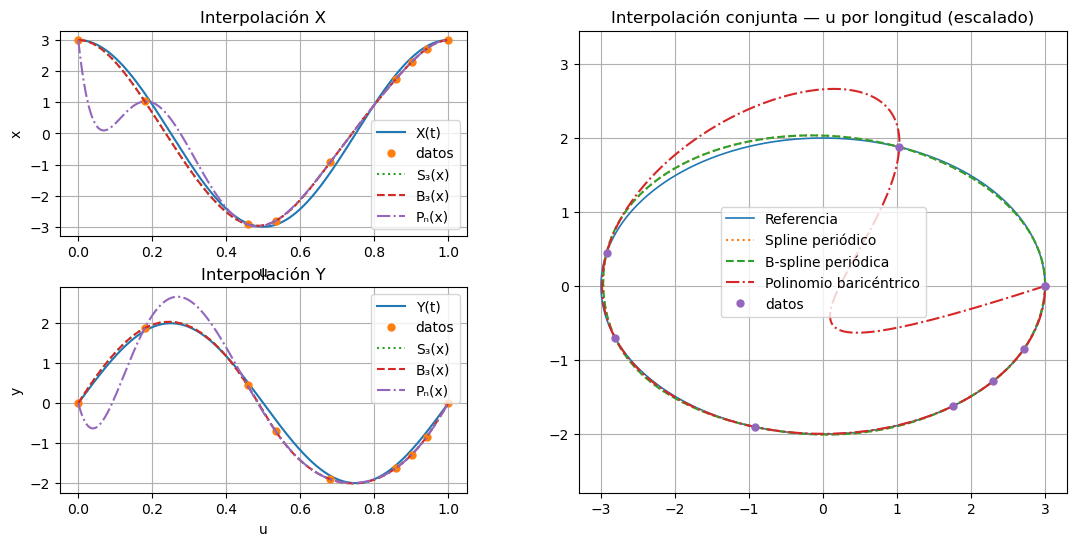

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator, CubicSpline, splprep, splev

# ================================
# Definición de los puntos (PDF)
# ================================
fun = lambda t: np.array([
    3*np.cos(2*np.pi*t),
    2*np.sin(2*np.pi*t)
])
npts = 9

alfa = np . random . rand ( npts -2) # valores aleatorios
alfa = np . concatenate ([[0] , alfa ,[1]]) # + extremos
alfa . sort () # ordena

data = fun(alfa).T                    # shape (npts, 2)  -> (x,y)

# ============================================
# Definición del parámetro u (longitud escalado)
# (siguiendo exactamente el esquema del enunciado)
# ============================================
u = np.diff(data, axis=0)             # diferencias entre puntos consecutivos
u = np.linalg.norm(u, axis=1)         # longitudes de cada tramo
u = np.cumsum(u)                      # suma acumulada de longitudes
u = np.concatenate(([0.0], u)) / u[-1]  # escalar a [0,1]

# Abscisas y ordenadas
x = data[:, 0]
y = data[:, 1]

# ================================
# Interpolantes paramétricos x(u), y(u)
# ================================

# — Polinomio (baricéntrico) sobre el parámetro u
Px = BarycentricInterpolator(u, x)
Py = BarycentricInterpolator(u, y)

# — Spline cúbico PERIÓDICO sobre u (con datos cerrados, NO duplicamos nada)
Sx = CubicSpline(u, x, bc_type='periodic')
Sy = CubicSpline(u, y, bc_type='periodic')

# — B-spline periódica con el MISMO parámetro u (per=1)
#     (splprep acepta primeros/últimos puntos iguales cuando per=1)
tck, _ = splprep([x, y], u=u, s=0, per=1)

# ================================
# Evaluación y representación
# ================================
U = np.linspace(0, 1, 1000)
# referencia analítica (misma elipse)
X_ref = 3*np.cos(2*np.pi*U)
Y_ref = 2*np.sin(2*np.pi*U)

X_poly, Y_poly = Px(U), Py(U)
X_spl,  Y_spl  = Sx(U), Sy(U)
X_bs,   Y_bs   = splev(U, tck)

fig = plt.figure(figsize=(13, 6))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.2], height_ratios=[1, 1], hspace=0.25, wspace=0.25)
axX = fig.add_subplot(gs[0, 0]); axY = fig.add_subplot(gs[1, 0]); axC = fig.add_subplot(gs[:, 1])

# X(u)
axX.plot(U, X_ref, '-',  label='X(t)')
axX.plot(u, x, 'o', ms=5, label='datos')
axX.plot(U, X_spl,  ':',  label='S₃(x)')
axX.plot(U, X_bs,   '--', label='B₃(x)')
axX.plot(U, X_poly, '-.', label='Pₙ(x)')
axX.set_title('Interpolación X'); axX.set_xlabel('u'); axX.set_ylabel('x'); axX.grid(True); axX.legend()

# Y(u)
axY.plot(U, Y_ref, '-',  label='Y(t)')
axY.plot(u, y, 'o', ms=5, label='datos')
axY.plot(U, Y_spl,  ':',  label='S₃(x)')
axY.plot(U, Y_bs,   '--', label='B₃(x)')
axY.plot(U, Y_poly, '-.', label='Pₙ(x)')
axY.set_title('Interpolación Y'); axY.set_xlabel('u'); axY.set_ylabel('y'); axY.grid(True); axY.legend()

# Curva en el plano
axC.plot(X_ref, Y_ref, '-',  lw=1.2, label='Referencia')
axC.plot(X_spl,  Y_spl,  ':',  label='Spline periódico')
axC.plot(X_bs,   Y_bs,   '--', label='B-spline periódica')
axC.plot(X_poly, Y_poly, '-.', label='Polinomio baricéntrico')
axC.plot(x, y, 'o', ms=5, label='datos')
axC.set_title('Interpolación conjunta — u por longitud (escalado)')
axC.axis('equal'); axC.grid(True); axC.legend()

plt.show()

Ejemplo 17 (Ejercicio 3). Crear una función que calcule el interpolante paramétrico mediante splines cúbicas de
tipo dado por bc_type. Se le puede pasar el parámetro u o sino crea uno proporcional a la distancia entre los puntos
y definido en [0,1].

In [21]:
import numpy as np
from scipy.interpolate import CubicSpline

def itp_parametrica(data, bc_type='natural', u=None):
    """
    Interpolante paramétrico mediante splines cúbicos para una poligonal 2D.

    Parámetros
    ----------
    data : array_like, shape (n, 2)
        Puntos de la poligonal (x_i, y_i) en orden.
    bc_type : str or tuple, default 'natural'
        Tipo de condición de contorno para CubicSpline:
        'natural', 'not-a-knot', 'clamped', 'periodic', o tupla con derivadas.
    u : array_like or None
        Parámetro de los puntos. Si None, se crea por longitud de cuerda y se escala a [0,1].

    Devuelve
    --------
    funitp : callable
        Función que, dado U (escalar o array en [0,1]), retorna puntos (N,2) del interpolante.
    parm : ndarray, shape (m,)
        Valores del parámetro u en los puntos de interpolación usados por el spline.
    """
    data = np.asarray(data, dtype=float)
    if data.ndim != 2 or data.shape[1] != 2:
        raise ValueError("data debe ser de forma (n, 2).")
    x, y = data[:, 0], data[:, 1]
    n = len(x)
    if n < 2:
        raise ValueError("Se requieren al menos 2 puntos.")

    # 1) Construcción (o validación) del parámetro u
    if u is None:
        # Longitud de cuerda (sin cierre por defecto)
        dif = np.diff(data, axis=0)
        seg = np.linalg.norm(dif, axis=1)
        u = np.concatenate(([0.0], np.cumsum(seg)))
        if u[-1] == 0:
            raise ValueError("Los puntos son coincidentes; no se puede parametrizar.")
        u = u / u[-1]
    else:
        u = np.asarray(u, dtype=float)
        if u.shape[0] != n:
            raise ValueError("u y data tienen distinto número de puntos.")
        # Asegurar escala [0,1] y estrictamente creciente
        rng = u[-1] - u[0]
        if rng == 0:
            raise ValueError("u no tiene variación (todos iguales).")
        u = (u - u[0]) / rng
        # Desempatar posibles repeticiones numéricas
        du = np.diff(u)
        if np.any(du <= 0):
            eps = np.finfo(float).eps
            for i in range(1, len(u)):
                if u[i] <= u[i-1]:
                    u[i] = u[i-1] + eps

    # 2) Si es 'periodic' y los datos no están cerrados, cerrar la curva
    closed = np.allclose(data[0], data[-1])
    if (bc_type == 'periodic') and (not closed):
        x = np.r_[x, x[0]]
        y = np.r_[y, y[0]]
        u = np.r_[u, 1.0]  # cierre en u=1
        n += 1

    # 3) Construcción de los splines cúbicos x(u), y(u)
    Sx = CubicSpline(u, x, bc_type=bc_type)
    Sy = CubicSpline(u, y, bc_type=bc_type)

    # 4) Devolver función vectorial y el parámetro en los nodos
    def funitp(U):
        U = np.asarray(U, dtype=float)
        X = Sx(U)
        Y = Sy(U)
        return np.column_stack([X, Y]) if X.ndim else np.array([X, Y])

    return funitp, u


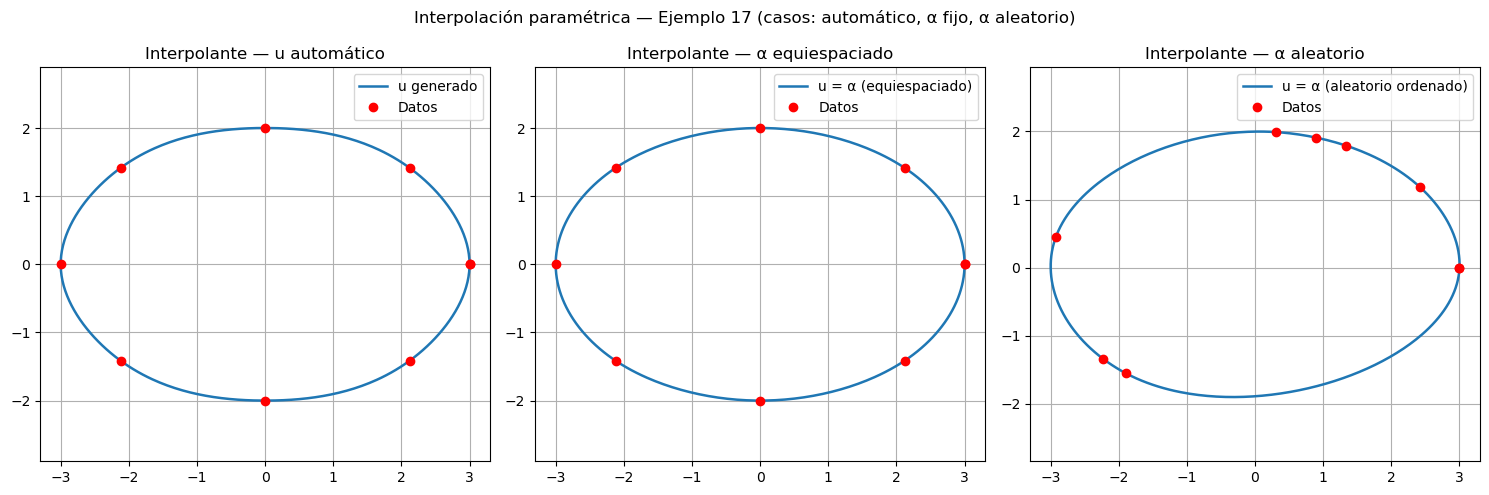

In [22]:
# ==========================================================
# Datos de comprobación (Ejemplo 17 ampliado)
# ==========================================================
import numpy as np
import matplotlib.pyplot as plt

# --- Definición de la elipse ---
fun = lambda t: np.array([3*np.cos(2*np.pi*t), 2*np.sin(2*np.pi*t)]).T

npts = 9

# ==========================================================
# CASO 1: Parámetro automático (longitud de cuerda)
# ==========================================================
alfa1 = np.linspace(0, 1, npts)
data1 = fun(alfa1)
f_auto, u_auto = itp_parametrica(data1, bc_type='periodic', u=None)

# ==========================================================
# CASO 2: Parámetro equiespaciado (α)
# ==========================================================
alfa2 = np.linspace(0, 1, npts)
data2 = fun(alfa2)
f_alfa, u_alfa = itp_parametrica(data2, bc_type='periodic', u=alfa2)

# ==========================================================
# CASO 3: Parámetro aleatorio ordenado (α aleatorio)
# ==========================================================
alfa3 = np.random.rand(npts-2)           # valores aleatorios intermedios
alfa3 = np.concatenate(([0], alfa3, [1])) # añade extremos 0 y 1
alfa3.sort()                              # ordena de menor a mayor
data3 = fun(alfa3)
f_rand, u_rand = itp_parametrica(data3, bc_type='periodic', u=alfa3)

# ==========================================================
# Evaluación y representación
# ==========================================================
U = np.linspace(0, 1, 400)
P_auto = f_auto(U)
P_alfa = f_alfa(U)
P_rand = f_rand(U)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# --- Caso 1 ---
# Automático (sin u)
# El parámetro u se calcula proporcional a la longitud de los segmentos (más realista físicamente).
# Curva suave, recorrido uniforme.
axs[0].plot(P_auto[:,0], P_auto[:,1], label='u generado', lw=1.8)
axs[0].plot(data1[:,0], data1[:,1], 'ro', label='Datos')
axs[0].set_title('Interpolante — u automático')
axs[0].axis('equal'); axs[0].grid(True); axs[0].legend()

# --- Caso 2 ---
# Equiespaciado (α)
# Los puntos están igualmente espaciados en t.
# La velocidad paramétrica no es uniforme; puede “estirarse” en zonas de alta curvatura.
axs[1].plot(P_alfa[:,0], P_alfa[:,1], label='u = α (equiespaciado)', lw=1.8)
axs[1].plot(data2[:,0], data2[:,1], 'ro', label='Datos')
axs[1].set_title('Interpolante — α equiespaciado')
axs[1].axis('equal'); axs[1].grid(True); axs[1].legend()

# --- Caso 3 ---
# Aleatorio ordenado
# α se genera al azar, pero se ordena.
# Permite comprobar que el método es estable incluso con espaciado irregular.
axs[2].plot(P_rand[:,0], P_rand[:,1], label='u = α (aleatorio ordenado)', lw=1.8)
axs[2].plot(data3[:,0], data3[:,1], 'ro', label='Datos')
axs[2].set_title('Interpolante — α aleatorio')
axs[2].axis('equal'); axs[2].grid(True); axs[2].legend()

plt.suptitle("Interpolación paramétrica — Ejemplo 17 (casos: automático, α fijo, α aleatorio)")
plt.tight_layout()
plt.show()


**Interpolación paramétrica: figura**

Ejemplos 18 (Curvas no cerradas). El fichero “ITP_animal.txt” contiene valores en tres columnas, correspondientes
al parámetro, la coordenada x y la coordenada y. Utilizar la interpolación paramétrica, con y sin parámetro, con
splines cúbicas y bsplines para representar la curva.

In [23]:
sal = np . genfromtxt ("IP_datos/ITP_animal.txt", delimiter=",")
t = sal.T[0]
data = sal.T[1:]

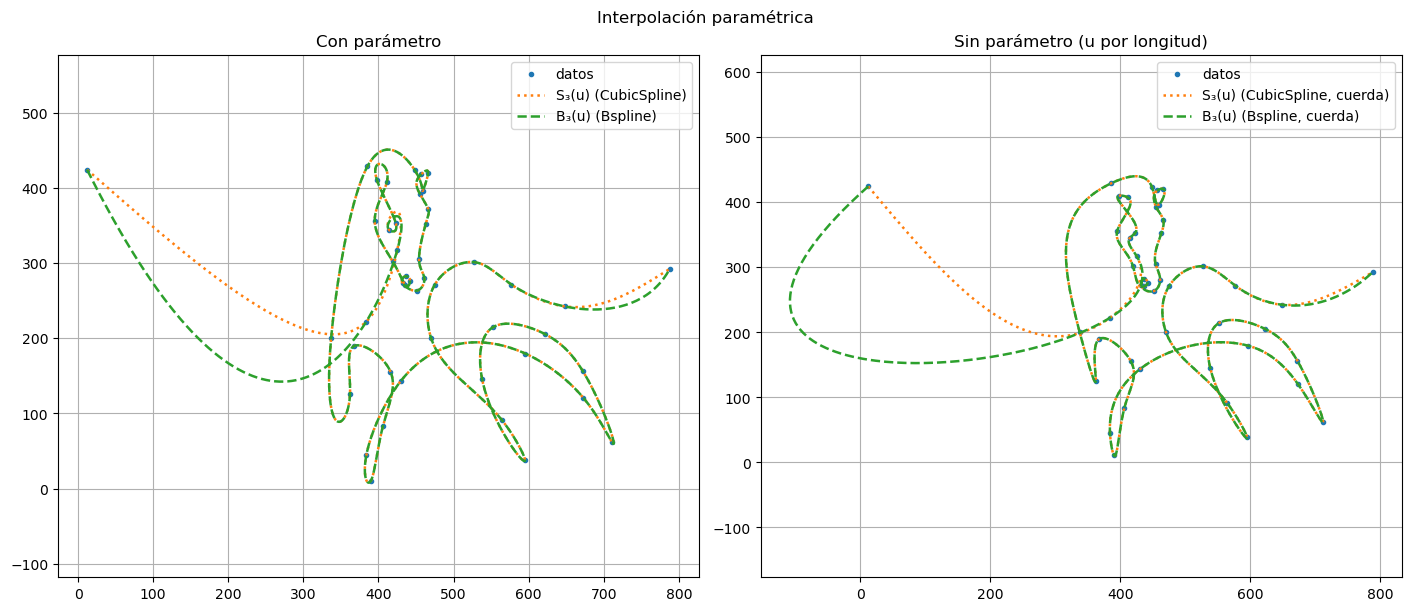

In [24]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, splprep, splev

# =========================
# 1) Cargar datos del fichero (SIN ordenar)
# =========================
sal  = np.genfromtxt('IP_datos/ITP_animal.txt', delimiter=',')
t    = sal[:, 0]        # parámetro del fichero (tal cual)
data = sal[:, 1:3]      # columnas x, y
x, y = data[:, 0], data[:, 1]

# Reescalo t a [0,1] (lineal; no cambia la geometría)
u_par = (t - t.min()) / (t.max() - t.min())

# =========================
# 2) CON parámetro (usa t del fichero)
# =========================
# Spline cúbico (curva abierta)
Sx_par = CubicSpline(u_par, x, bc_type='natural')
Sy_par = CubicSpline(u_par, y, bc_type='natural')

# B-spline exacta (NO periódica)
tck_par, _ = splprep([x, y], u=u_par, s=0, per=False)

# =========================
# 3) SIN parámetro (u por longitud de cuerda, escalado a [0,1])
# =========================
d        = np.diff(data, axis=0)               # diferencias entre puntos
seg      = np.linalg.norm(d, axis=1)           # longitudes de tramos
u_auto   = np.concatenate(([0.0], np.cumsum(seg)))
u_auto   = u_auto / u_auto[-1]

Sx_aut = CubicSpline(u_auto, x, bc_type='natural')
Sy_aut = CubicSpline(u_auto, y, bc_type='natural')

tck_aut, _ = splprep([x, y], u=u_auto, s=0, per=False)

# =========================
# 4) Evaluación y gráfico
# =========================
U = np.linspace(0, 1, 1200)

# Con parámetro
Xsp_par, Ysp_par = Sx_par(U), Sy_par(U)
Xbs_par, Ybs_par = splev(U, tck_par)

# Sin parámetro (u por cuerda)
Xsp_aut, Ysp_aut = Sx_aut(U), Sy_aut(U)
Xbs_aut, Ybs_aut = splev(U, tck_aut)

fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)
fig.suptitle("Interpolación paramétrica")

# Panel izquierdo: Con parámetro (t del fichero)
axs[0].plot(x, y, 'o', ms=3, label='datos')
axs[0].plot(Xsp_par, Ysp_par, ':',  lw=1.8, label='S₃(u) (CubicSpline)')
axs[0].plot(Xbs_par, Ybs_par, '--', lw=1.8, label='B₃(u) (Bspline)')
axs[0].set_title("Con parámetro")
axs[0].axis('equal'); axs[0].grid(True); axs[0].legend()

# Panel derecho: Sin parámetro (u por longitud de cuerda)
axs[1].plot(x, y, 'o', ms=3, label='datos')
axs[1].plot(Xsp_aut, Ysp_aut, ':',  lw=1.8, label='S₃(u) (CubicSpline, cuerda)')
axs[1].plot(Xbs_aut, Ybs_aut, '--', lw=1.8, label='B₃(u) (Bspline, cuerda)')
axs[1].set_title("Sin parámetro (u por longitud)")
axs[1].axis('equal'); axs[1].grid(True); axs[1].legend()

plt.show()
